In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [15,8]

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
# Import Data
df = pd.read_csv(r"D:\Dig\00-imarticus\OLS-Property Price Prediction\Dataset\HousePrices.csv")

# ------------------------------------------ Understanding Data ------------------------------------------------------

def understanding_data(data):
    
    # Shape of the data
    print('\n')
    print(f"Shape Of The Data: {data.shape}")
    print(f"Number Of The Rows: {data.shape[0]}")
    print(f"Number Of The Columns: {data.shape[1]}\n")
    print('-'*80)
    
    # Checking Data Type
    print('\n')
    print("Data Type Of All The Columns:")
    print('\n')
    print(data.info())
    print('\n')
    print('-'*80)
    
    # Understanding The Numerical & Non-Numerical Data    
    print('\n')
    numerical_data = data.select_dtypes(include=[np.number])
    non_numerical_data = data.select_dtypes(exclude=[np.number])
    
    print('\n')
    print(f"Number Of Numerical Features: {numerical_data.shape[1]}\n")
    print(f"All Numerical Features: {numerical_data.columns}\n")
    print('-'*80)
    print('\n')
    print(f"Number Of Non-Numerical Features: {non_numerical_data.shape[1]}\n")
    print(f"All Non-Numerical Features: {non_numerical_data.columns}\n")
    print('-'*80)
    print('\n')
    
    # Null Values Presents In The Data
    print('\n')
    print("Null Values Presents In The Dataset:\n")
    print(data.isna().sum())
    print('\n')
    print(f"Total Missing Values In DataFrame: {data.isnull().sum().sum()}")
    print('\n')
    print(f"List Of All The Columns Which Has Null Values: {df.columns[df.isnull().any()].tolist()}")
    print('\n')
    print(f"Total Count Of Columns Which Has Null Values: {len(df.columns[df.isnull().any()].tolist())}")
    print('\n')
    num = pd.DataFrame(numerical_data)
    print(f"List Of All The Numerical Columns Which Has Null Values: {num.columns[num.isnull().any()].tolist()} \n")
    print(f"Total Counts Of Numerical Columns Which Has Null Values: {len(num.columns[num.isnull().any()].tolist())} \n\n")
    cat = pd.DataFrame(non_numerical_data)
    print(f"List Of All The Non-Numerical Columns Which Has Null Values: {cat.columns[cat.isnull().any()].tolist()} \n")
    print(f"Total Counts Of Non-Numerical Columns Which Has Null Values: {len(cat.columns[cat.isnull().any()].tolist())} \n")
    print('-'*80)
    
    return data.head()

understanding_data(df)



Shape Of The Data: (2073, 81)
Number Of The Rows: 2073
Number Of The Columns: 81

--------------------------------------------------------------------------------


Data Type Of All The Columns:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   ob

Total Count Of Columns Which Has Null Values: 19


List Of All The Numerical Columns Which Has Null Values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 

Total Counts Of Numerical Columns Which Has Null Values: 3 


List Of All The Non-Numerical Columns Which Has Null Values: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 

Total Counts Of Non-Numerical Columns Which Has Null Values: 16 

--------------------------------------------------------------------------------


,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**OBSERVATIONS:**

- Shape:  (2073, 81)

- Numerical Features:  38

- Non-Numerical Features:  43

- Total 19 Columns has null values (including numerical & non-numerical)


<br>
_____________________________________________________________________________________________________________________________

## Data preparation is the process of cleaning and transforming raw data before building predictive models. <br>
**Here, we analyze and perform the following tasks:**<br>
1. Check data types. Ensure your data types are correct.<br>
2. We need to change the data types as per requirement If they are not as per business definition <br>
3. Go through the summary statistics<br>
4. Distribution of variables<br>
5. Study the correlation<br>
6. Detect outliers from the data<br>
7. Look for the missing values<br><br>

### 1.) Check data types. Ensure your data types are correct.

`From the above output, we can see that 'Dwell_Type', 'OverallQual' and 'OverallCond' have data type as 'int64'.
But as per the data definition, 'Dwell_Type ', 'OverallQual' and 'OverallCond' are categorical variables, so we need to convert these variables data type to 'object'.`

In [3]:
def to_object(data, feature):
    data[feature] = data[feature].astype('O')
    
cols = ['Dwell_Type', 'OverallQual', 'OverallCond']

for i in cols:
    to_object(df, i)
    
non_numerical_data = df.select_dtypes(exclude=[np.number])
print(f"All Non-Numerical Features: {list(non_numerical_data.columns)}\n")

print(f"Length Of Non-Numerical Features List: {len(list(non_numerical_data.columns))}\n")

print(f"Exist in All Non-Numerical Columns List: {next(True for i in cols if i in list(non_numerical_data.columns))}")

All Non-Numerical Features: ['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Length Of Non-Numerical Features List: 46

Exist in All Non-Numerical Columns List: True


#### Dropping 'Id' Column

In [4]:
# Removing Unnecessary Columns

def remove_cols(data, feature):
    data.drop(feature, axis = 1,inplace = True)
    return data.head(2)
    
remove_cols(df, 'Id')

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


<br>
______________________________________________________________________________________________________________________________

## Summary Statistics

#### Stats Summary Of Numerical Data

In [5]:
# by default the describe function returns the summary of numerical variables
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1753.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,72.056475,10717.853353,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,27.987475,9215.982306,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7620.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,70.000000,9492.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,83.000000,11601.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

We can see that the LotFrontage ranges from 21 feet to 313 feet, with mean 70 feet. We can see that the minimum pool area is 0 sq.ft. and this means that not all houses have pools and yet have been considered to calculate the mean pool area. Also the count for LotFrontage is less than the total number of observations which indicates the presence of missing values.

#### Stats Summary Of Categorical Data

In [6]:
# summary of categorical variables
df.describe(include = object)

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2059,2073,2073,2073,2014,2014,2012,2014,2013,2073,2073,2073,2072,2073,2073,1085,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,18,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,722,1611,2063,72,1300,1854,2070,1481,1958,317,1794,2054,1719,1036,508,943,1606,2036,750,729,1233,1272,1815,928,904,1851,1349,604,1770,2025,1045,1935,1901,1043,1937,530,1252,857,1870,1885,1913,4,233,74,1797,1695


The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.:

- Lets understand the outputs of the above table using variable 'Property_Shape'

- count: Number of observations = 2073

- unique: Number of unique classes in the column = 4 classes

- top: The most occurring class = Reg

- frequency: Frequency of the most repeated class; out of 2073 observations Reg has a frequency of 925

It is visible that some of the variables have count less than total number of observations which indicates the presence of 
missing values.

**As, the variable `PoolQC` has only 8 non-zero values out of 2073 observations. And also the variable `PoolArea` contains the area of these 8 pools, we will remove the variables `PoolQC` and `PoolArea`.**

In [7]:
cols = ['PoolQC', 'PoolArea']
for i in cols:
    remove_cols(df,i)

In [8]:
df.head(2)

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
df.shape

(2073, 78)

<br>
___________________________________________________________________________________________________________________________

## Distribution Of Variables

In [10]:
print(f"All Non-Numerical Features: {list(non_numerical_data.columns)}\n")

All Non-Numerical Features: ['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



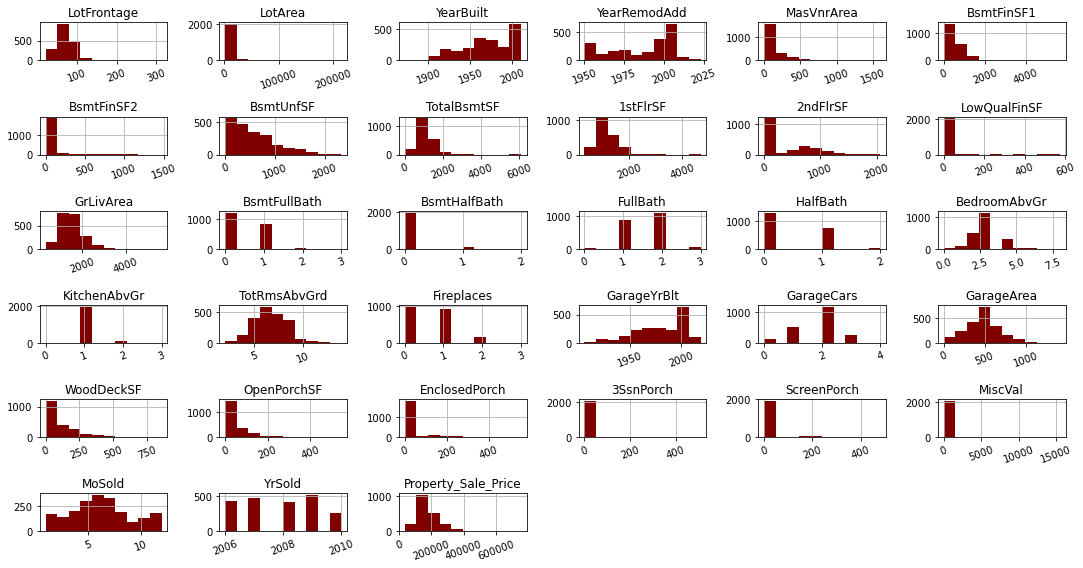

In [11]:
# plot the histogram of numeric variables
# hist() by default considers the numeric variables only, 
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
df.hist(xrot = 20,color = "maroon")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

#### Visualize The Target Variable

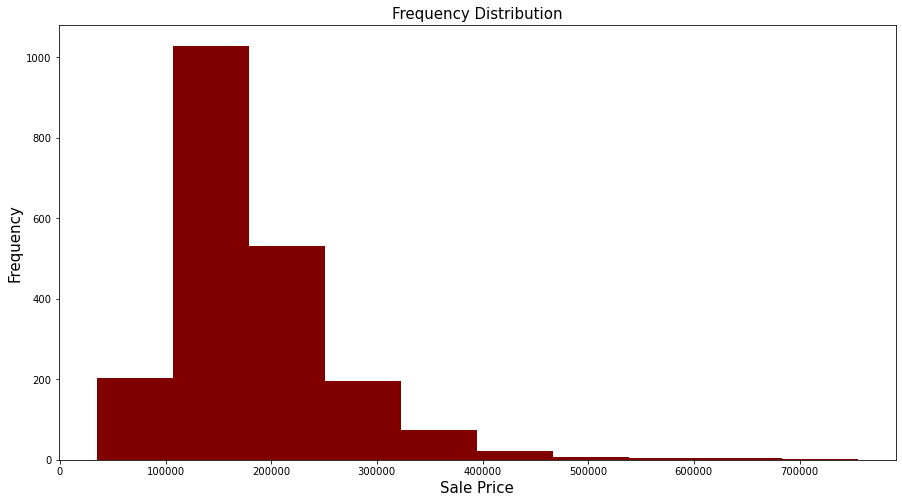

In [12]:
# Sale Price Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("Sale Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df["Property_Sale_Price"], color = 'maroon')
plt.show()

**OBSERVATIONS:**

	
The above plot shows that the target variable `Property_Sale_Price` is right skewed.

<br>
____________________________________________________________________________________________________________________________

## Distribution Of Categorical Variable

In [13]:
print(f"All Non-Numerical Features: {list(non_numerical_data.columns)}\n")

All Non-Numerical Features: ['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



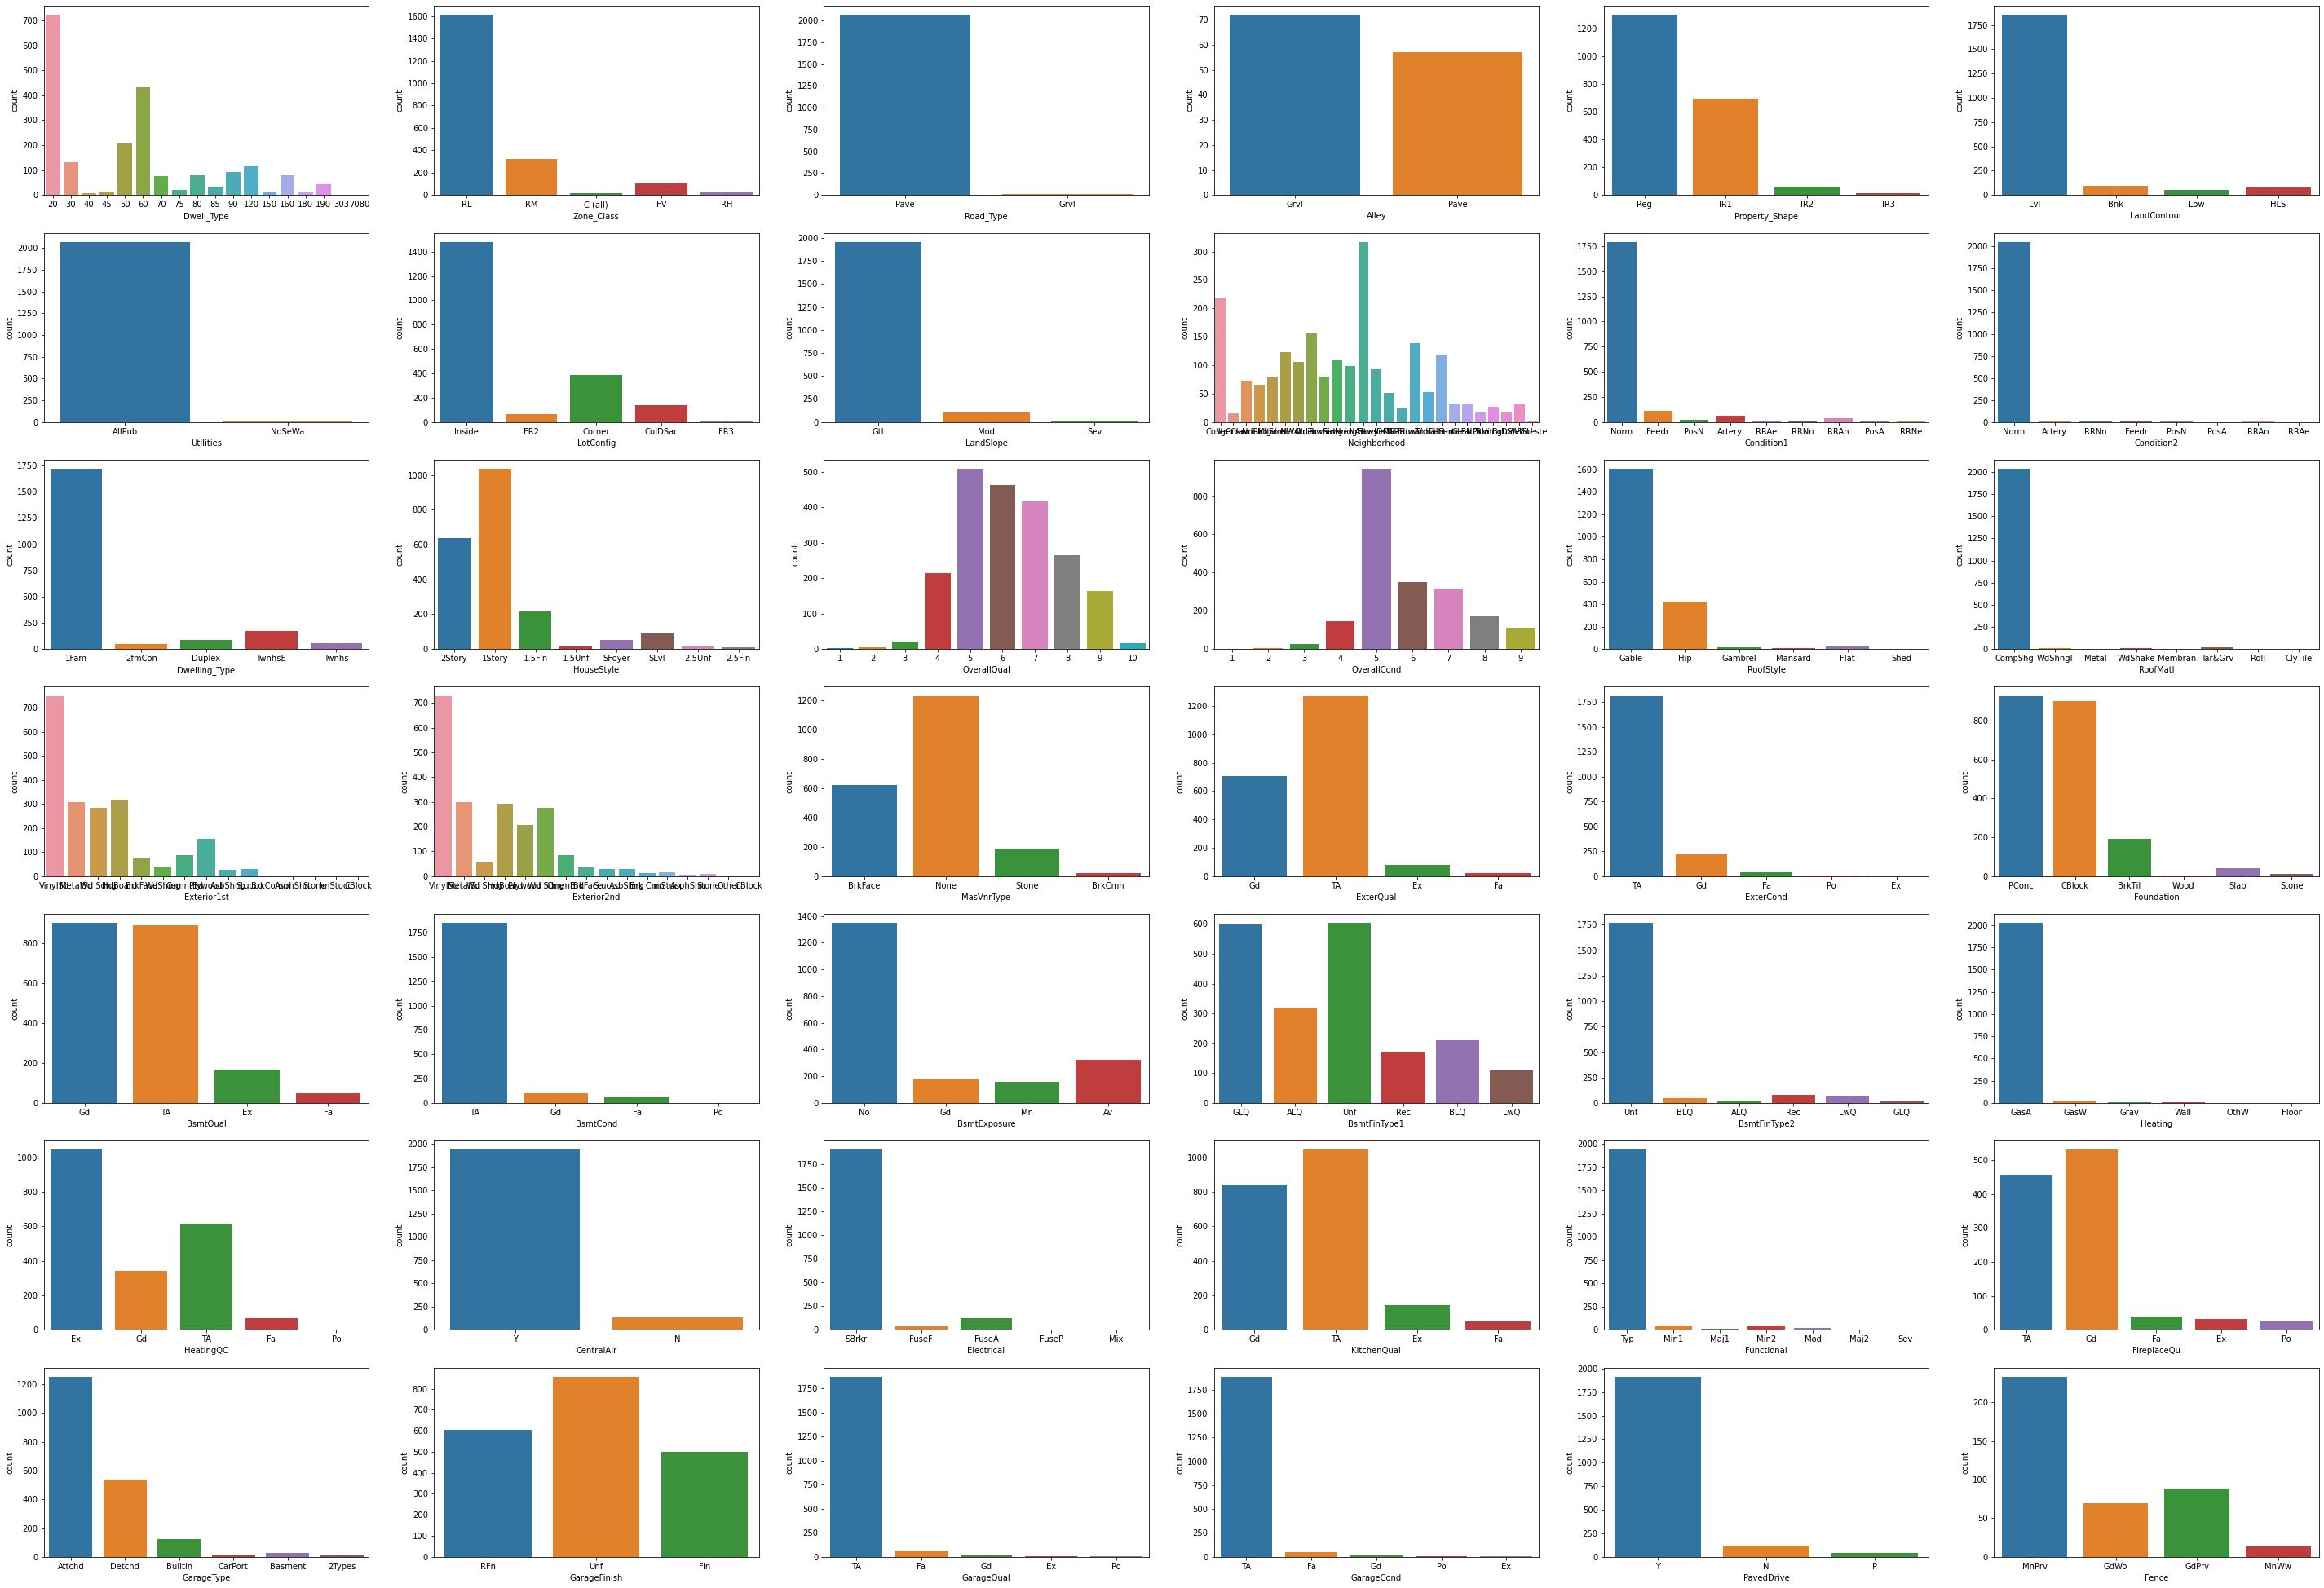

In [14]:
non_numerical_data = df.select_dtypes(exclude=[np.number])
cat_data = list(non_numerical_data.columns)

fig, ax = plt.subplots(nrows=7, ncols=6, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(cat_data, ax.flatten()):
    sns.countplot(df[variable], ax = subplot)
    
# display the plot
plt.show()

## Function To Plot Box Plot

In [15]:
def draw_boxplot(data, feature_y, feature_x):
    # draw the boxplot for OverallQuality and the Property_Sale_Price
    sns.boxplot(y=feature_y, x=feature_x,data= data)

    # set the title of the plot and the fontsize
    plt.title(f"{feature_y} vs {feature_x}", fontsize=15)

    # set the xlabel and the fontsize
    plt.xlabel(f"{feature_x}", fontsize=15)

    # set the ylabel and the fontsize
    plt.ylabel(f"{feature_y}", fontsize=15)

    # display the plot
    plt.show()

### Boxplot of OverallQuality and Property_Sale_Price

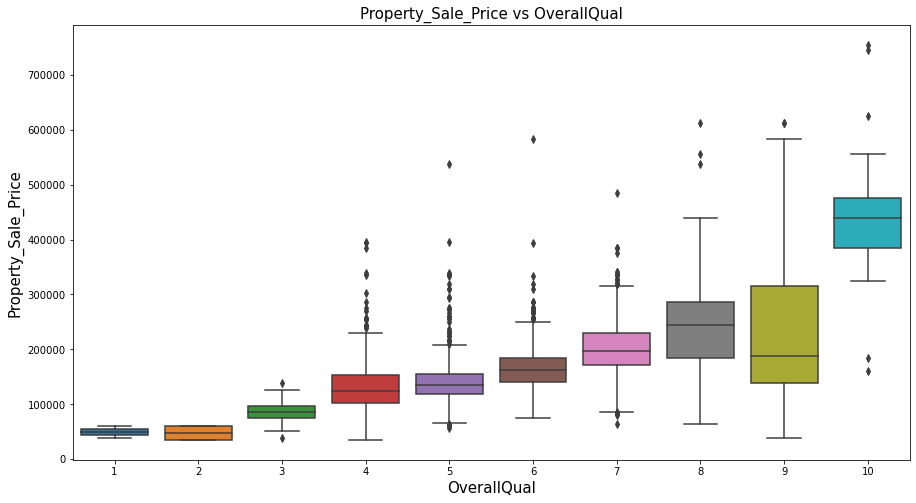

In [16]:
draw_boxplot(df, "Property_Sale_Price", "OverallQual")

### Boxplot of Overall Condition and Property_Sale_Price

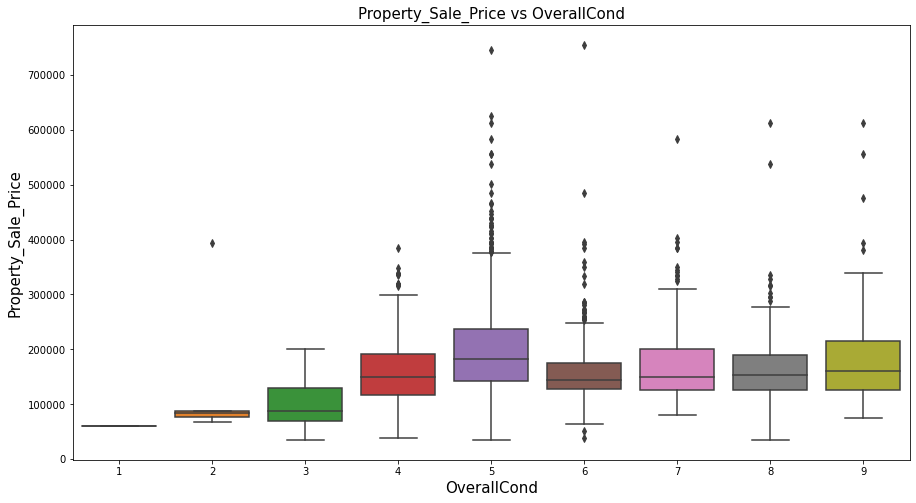

In [17]:
draw_boxplot(df, "Property_Sale_Price", "OverallCond")

## Draw the pairplot of the numeric variables

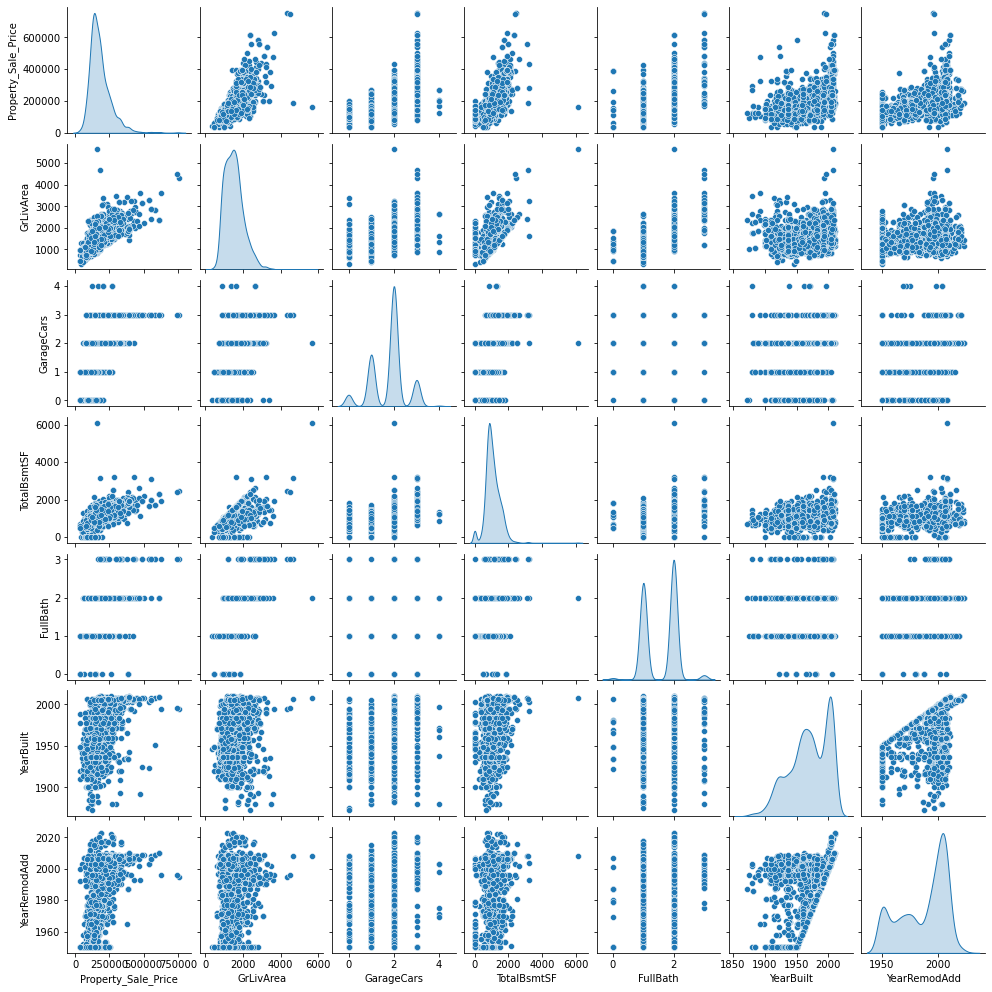

In [18]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["Property_Sale_Price", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(df[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

<br>
_______________________________________________________________________________________________________________________________

## Outliers Discovery

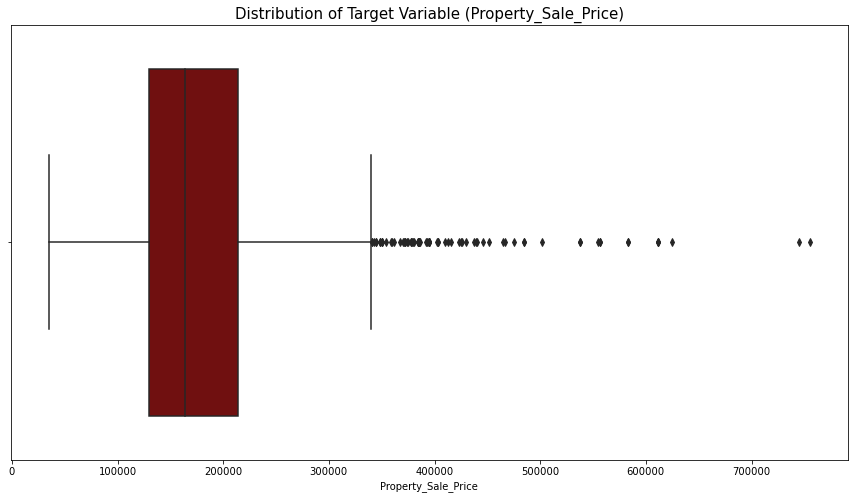

In [19]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df['Property_Sale_Price'], color='maroon')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)

# display the plot
plt.show()

From the above plot we can see that there are outliers present in the target variable 'Property_Sale_Price'. Outliers badly affect the prediction of the regression model and thus, we will remove these outliers.

In [20]:
# remove the observations with the house price greater than or equal to 500000
df = df[df['Property_Sale_Price'] < 500000]

# check the dimension of the data
df.shape

(2059, 78)

<br>
______________________________________________________________________________________________________________________________

## Missing Values

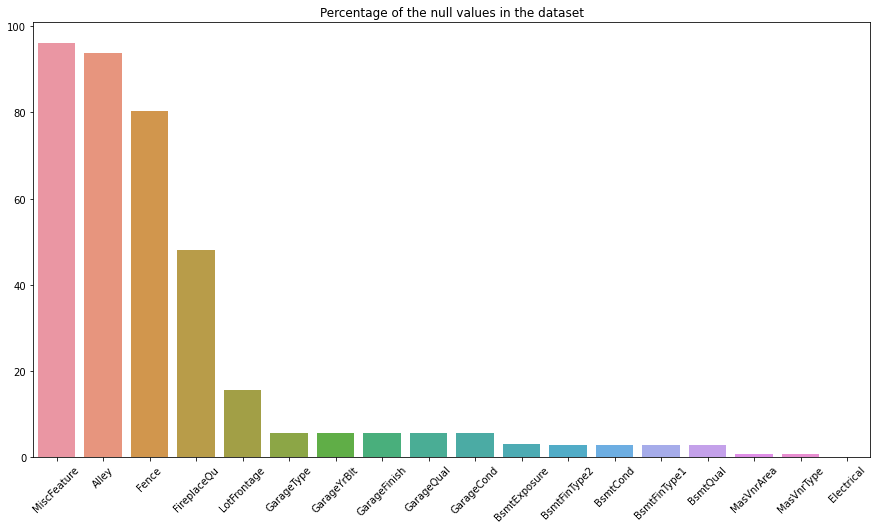

<AxesSubplot:title={'center':'Percentage of the null values in the dataset'}>

In [21]:
def check_null(data):
    null_percentage = (data.isna().sum() / len(data))*100
    
    try:
        # Dropping columns having null value % to 0
        mask = (null_percentage != 0.0)
        null_percentage = null_percentage[mask].sort_values(ascending=False)
        
        # Plot Bar Of %
        null_plot = sns.barplot(x = null_percentage.index, y = null_percentage)
        null_plot.tick_params(axis='x', labelrotation = 45)
        plt.title("Percentage of the null values in the dataset")
        plt.show()
        
    except:
        print("There is no null value in the dataset")
        print("Returning the dataset...")
    
    return null_plot

check_null(df)

In [22]:
values = df.columns[df.isnull().any()].tolist()

for i in df[values]:
    print(f"Information of Null values in {i} Column:\n")
    
    # Calculating Number of Missing values
    val1 = len(df) - df[i].notnull().sum()
    
    # Calculating % of Missing values
    val2 = ((df[i].isnull().sum()/len(df))*100)
    
    print(f"NULL values in Numbers: {val1}")
    print(f"NULL values in Percentage: {val2}%\n")
    
    print("-"*50)

Information of Null values in LotFrontage Column:

NULL values in Numbers: 320
NULL values in Percentage: 15.541525012141816%

--------------------------------------------------
Information of Null values in Alley Column:

NULL values in Numbers: 1930
NULL values in Percentage: 93.73482272948033%

--------------------------------------------------
Information of Null values in MasVnrType Column:

NULL values in Numbers: 14
NULL values in Percentage: 0.6799417192812044%

--------------------------------------------------
Information of Null values in MasVnrArea Column:

NULL values in Numbers: 14
NULL values in Percentage: 0.6799417192812044%

--------------------------------------------------
Information of Null values in BsmtQual Column:

NULL values in Numbers: 59
NULL values in Percentage: 2.8654686741136475%

--------------------------------------------------
Information of Null values in BsmtCond Column:

NULL values in Numbers: 59
NULL values in Percentage: 2.8654686741136475%

-

In [23]:
total_nulls = df.isna().sum().sort_values(ascending=False)

# Calculating % of Missing values
percent_null = (df.isnull().sum()*100/df.isnull().count())
percent_null = percent_null.sort_values(ascending=False)

# Concat
miss_val = pd.concat([total_nulls, percent_null], axis=1, keys=['Total Nulls', 'Percentage of Missing Values'])

# add the col
miss_val['Data Type'] = df[miss_val.index].dtypes
miss_val

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
LotFrontage,320,15.541525,float64
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
GarageYrBlt,113,5.488101,float64


**OBSERVATIONS:**

- We can see that currently 18 features has missing values with `MiscFeature` with highest & `Electrical` lowest missing values.

## Handling Missing Values 

### * Numerical Data

In [24]:
# filter out the categorical variables and consider only the numeric variables with missing values
num_missing_val = miss_val[(miss_val['Total Nulls']>0) & (miss_val['Data Type'] != 'object')]
num_missing_val

,Total Nulls,Percentage of Missing Values,Data Type
LotFrontage,320,15.541525,float64
GarageYrBlt,113,5.488101,float64
MasVnrArea,14,0.679942,float64


For the numerical variables, we can replace the missing values by their mean, median or mode as per the requirement.

####  The variable 'LotFrontage' is `right skewed` and thus we will fill the missing values with its `median` value

In [25]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

#### We will replace the missing values in the numeric variable `GarageYrBlt` by 0. 
#### The missing values in this variable indicates that there are 81 observations for which garage facility is not available.

In [26]:
# use the function fillna() to replace missing values in 'GarageYrBlt' with 0 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

#### The variable 'MasVnrArea' is `positively skewed` and thus we will fill the missing values with its `median` value

In [27]:
# use the function fillna() to fill the missing values
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

### * Categorical Data

In [28]:
# filter out the numerical variables and consider only the categorical variables with missing values
cat_missing_values = miss_val[(miss_val['Total Nulls'] > 0) & (miss_val['Data Type'] == 'object')]
cat_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
BsmtExposure,61,2.962603,object
BsmtFinType2,60,2.914036,object


In [29]:
# According to the data definition, 'NA' denotes the absence of miscellaneous feature

# replace NA values in 'MiscFeature' with a valid value, 'None'
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# replace NA values in 'Alley' with a valid value, 'No alley access' 
df['Alley'] = df['Alley'].fillna('No alley access')

# replace NA values in 'Fence' with a valid value, 'No Fence'
df['Fence'] = df['Fence'].fillna('No Fence')

# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [30]:
# replace the missing values in the categoric variables representing the garage by `No Garage`
for col in ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']:
    df[col].fillna('No Garage', inplace = True)

In [31]:
# according to the data definition, 'NA' denotes the absence of basement in the variabels 
# ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']
# replace the missing values in the categoric variables representing the basement by `No Basement`
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    df[col].fillna('No Basement', inplace = True)

In [32]:
# according to the data definition, 'NA' denotes the absence of masonry veneer
# replace the missing values in the categorical variable 'MasVnrType' with a value, 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [33]:
# replace the missing values in the categorical variable 'Electrical' with its mode
mode_electrical = df['Electrical'].mode()
df['Electrical'].fillna(mode_electrical[0] , inplace = True)

In [34]:
df.isna().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
Alley                  0
Property_Shape         0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0


<br>
_____________________________________________________________________________________________________________________________

## Study Correlation

correlation indiactes strengths and direction of the linear relationship between 2 variables.

In [35]:
corval = df.corr()
corval

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
LotFrontage,1.000000,0.238191,0.081517,0.092211,0.111412,0.118122,0.055937,0.105129,0.256237,0.318458,0.054620,0.024525,0.284689,0.078472,-0.036578,0.153532,0.036507,0.207026,0.009171,0.264457,0.193244,0.081887,0.216162,0.248652,0.073232,0.092217,0.000492,0.037425,0.018689,-0.003469,0.028949,0.024222,0.259284
LotArea,0.238191,1.000000,-0.017109,0.013312,0.041665,0.157255,0.077684,-0.000161,0.193753,0.239459,0.023070,-0.000437,0.196624,0.123539,0.031117,0.085524,-0.002532,0.103089,-0.007048,0.143813,0.208337,0.064729,0.120713,0.137110,0.112262,0.063370,-0.021205,0.011367,0.027271,0.031767,0.000059,-0.008380,0.201837
YearBuilt,0.081517,-0.017109,1.000000,0.534846,0.258605,0.200397,-0.027750,0.117984,0.322489,0.225896,0.011759,-0.180594,0.158950,0.139671,-0.018345,0.398912,0.191748,-0.057029,-0.143052,0.069192,0.127941,0.219338,0.453642,0.404166,0.182813,0.178019,-0.321816,0.034844,-0.050894,-0.038275,0.031601,-0.007701,0.456523
YearRemodAdd,0.092211,0.013312,0.534846,1.000000,0.153766,0.092169,-0.074160,0.197311,0.275945,0.214706,0.133300,-0.084622,0.265337,0.099852,-0.011554,0.419381,0.176598,-0.038715,-0.127357,0.161845,0.099378,0.111173,0.387912,0.329864,0.182945,0.218917,-0.176180,0.040749,-0.044323,-0.011217,0.038320,0.055504,0.497005
MasVnrArea,0.111412,0.041665,0.258605,0.153766,1.000000,0.203449,-0.077174,0.128413,0.317306,0.289921,0.175364,-0.071076,0.358569,0.065543,0.020719,0.257621,0.192465,0.103158,-0.052282,0.244016,0.263473,0.131745,0.340641,0.342405,0.113509,0.136036,-0.094168,0.033596,0.054797,-0.034648,-0.006236,0.011242,0.438844
BsmtFinSF1,0.118122,0.157255,0.200397,0.092169,0.203449,1.000000,-0.063139,-0.514643,0.468375,0.377574,-0.144388,-0.071639,0.146652,0.641491,0.080676,0.022725,0.003940,-0.129599,-0.089633,-0.022325,0.202566,0.093347,0.179226,0.244935,0.208102,0.108858,-0.086769,0.047758,0.042606,-0.000288,-0.011921,0.019093,0.342365
BsmtFinSF2,0.055937,0.077684,-0.027750,-0.074160,-0.077174,-0.063139,1.000000,-0.207872,0.106746,0.095781,-0.115530,-0.003752,-0.029608,0.170270,0.068032,-0.093610,-0.044307,-0.017684,-0.043336,-0.048209,0.039138,0.046382,-0.042634,-0.019151,0.076978,-0.001180,0.058115,-0.030464,0.098692,-0.002251,-0.016672,0.025224,-0.028908
BsmtUnfSF,0.105129,-0.000161,0.117984,0.197311,0.128413,-0.514643,-0.207872,1.000000,0.444357,0.329430,-0.002545,0.032617,0.244148,-0.412720,-0.111400,0.291071,-0.046310,0.154499,0.014057,0.247856,0.077578,0.045420,0.225198,0.197519,-0.005751,0.141691,-0.010603,0.009747,-0.013646,-0.019743,0.044928,-0.048135,0.243283
TotalBsmtSF,0.256237,0.193753,0.322489,0.275945,0.317306,0.468375,0.106746,0.444357,1.000000,0.779426,-0.198123,-0.041315,0.399745,0.295662,-0.007614,0.295603,-0.062438,0.022277,-0.095253,0.220785,0.308159,0.163401,0.408374,0.456518,0.240381,0.262956,-0.078579,0.047997,0.068569,-0.022127,0.028723,-0.021312,0.602471
1stFlrSF,0.318458,0.239459,0.225896,0.214706,0.289921,0.377574,0.095781,0.329430,0.779426,1.000000,-0.240017,-0.020983,0.528308,0.222190,-0.010812,0.354512,-0.153219,0.113136,0.068935,0.372284,0.381998,0.163309,0.419084,0.462783,0.240294,0.216539,-0.049631,0.064372,0.074862,-0.027565,0.048724,-0.003292,0.581605


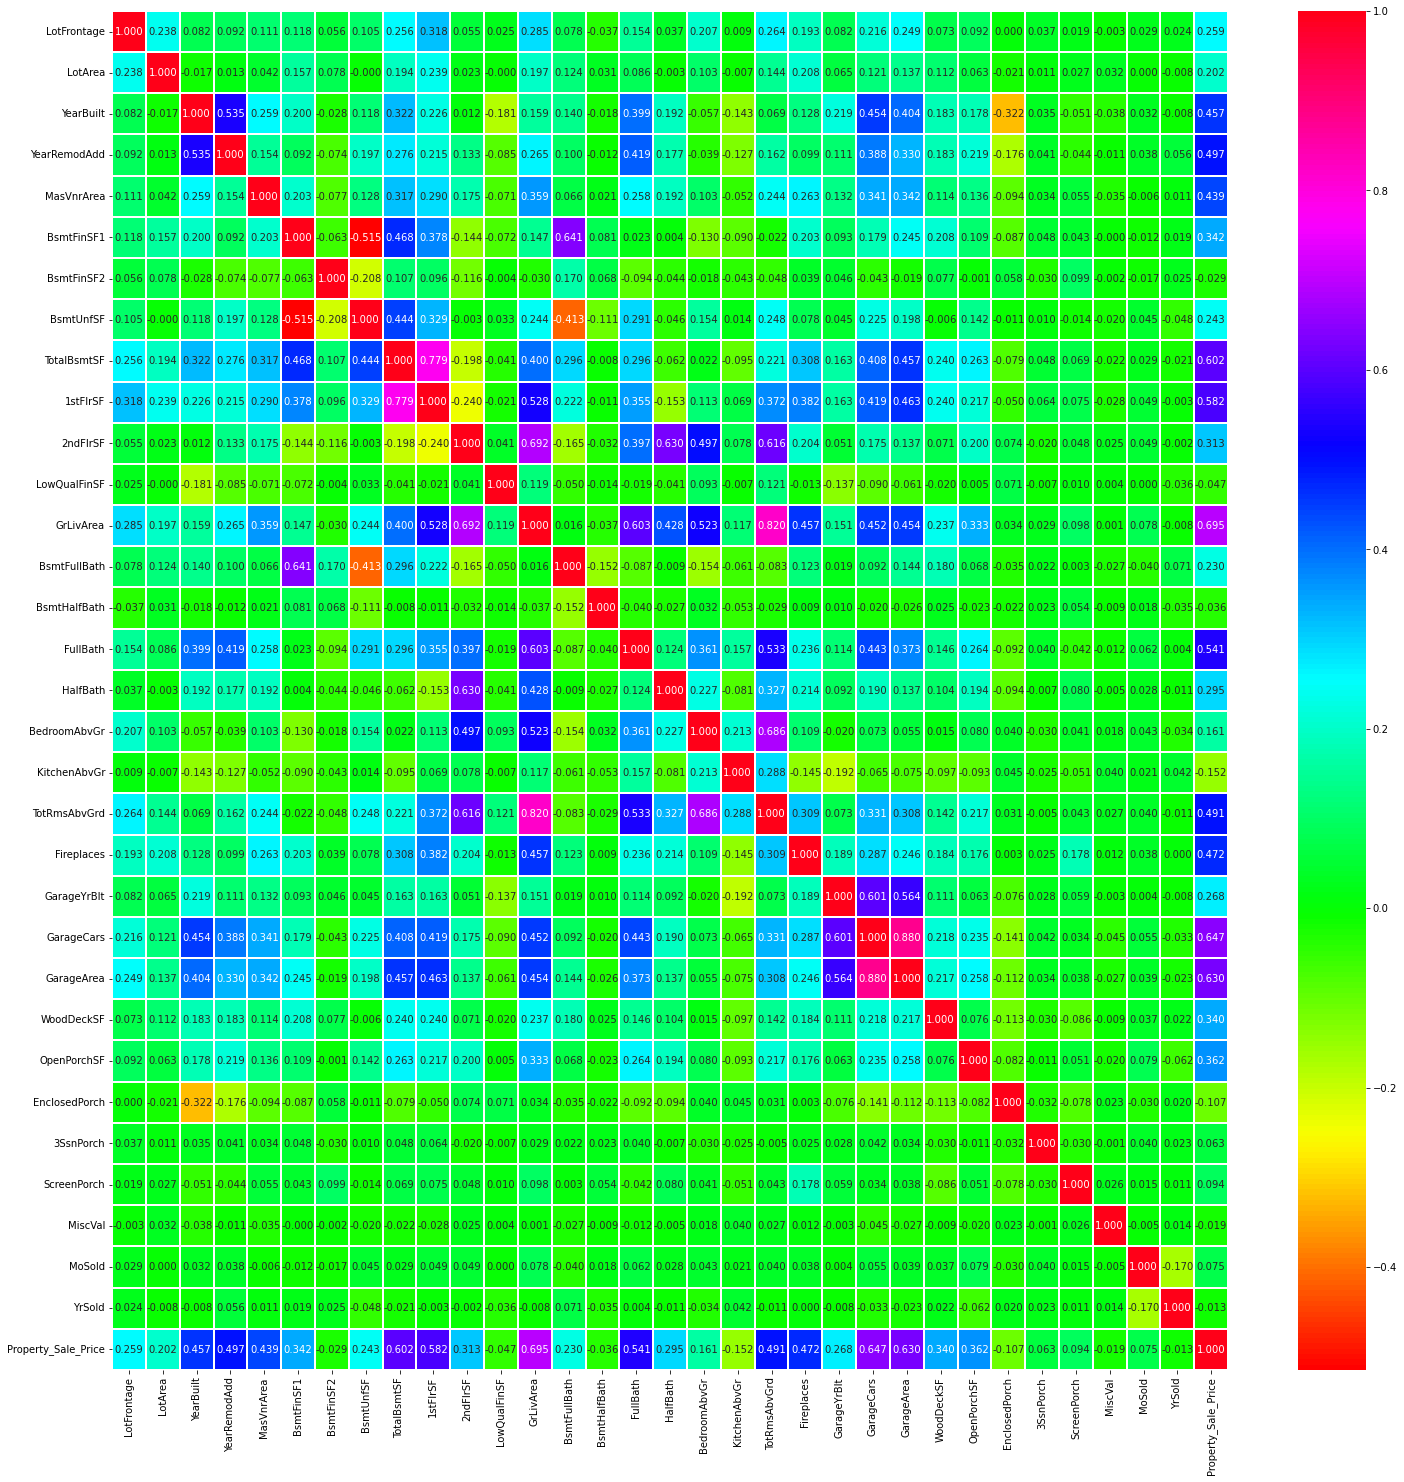

In [36]:
plt.figure(figsize=(25,25))                                       # Help to set figure size                                     

sns.heatmap(corval,annot=True,cmap='hsv',fmt='.3f',linewidths=2)    
         
# annot : Help to see the value in box
# cmap : The mapping from data values to color space.
# fmt : String formatting code to use when adding annotations.

plt.show()

The diagonal represents the correlation of the variable with itself thus all the diagonal entries are '1'. The dark red squares represent the variables with strong positive correlation.

From the above plot we can see that the highest positive correlation (= 0.88) is between the variables 'GarageArea' and 'GarageCars'. Also there is strong positive correlation between the pairs (1StFlrSF, TotalBsmtSF) and (TotRmsAbvGrd, GrlivArea). There may be multicollinearity present.
No two variables have strong negative correlation in the dataset.

In [37]:
# -------------------------------------- Selecting Columns to Eliminating --------------------------------------------

def correlation(data, threshold):
    
    col_corr = set()                                      # Set of all the name of correlated elements      
    cor_mtx  = data.corr()
    
    for i in range(len(cor_mtx.columns)):
        for j in range(i):
            if abs(cor_mtx.iloc[i,j]) > threshold:       # We are interested in absolute coeff value
                colname = cor_mtx.columns[i]             # Getting the name of columns
                col_corr.add(colname)
    return col_corr

correlation(df,0.70)

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

**Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.**

### Analyze Relationships Between Target and Categorical Variables

Plot the box-and-whisker plot for visualizing relationships between target and categorical variables.

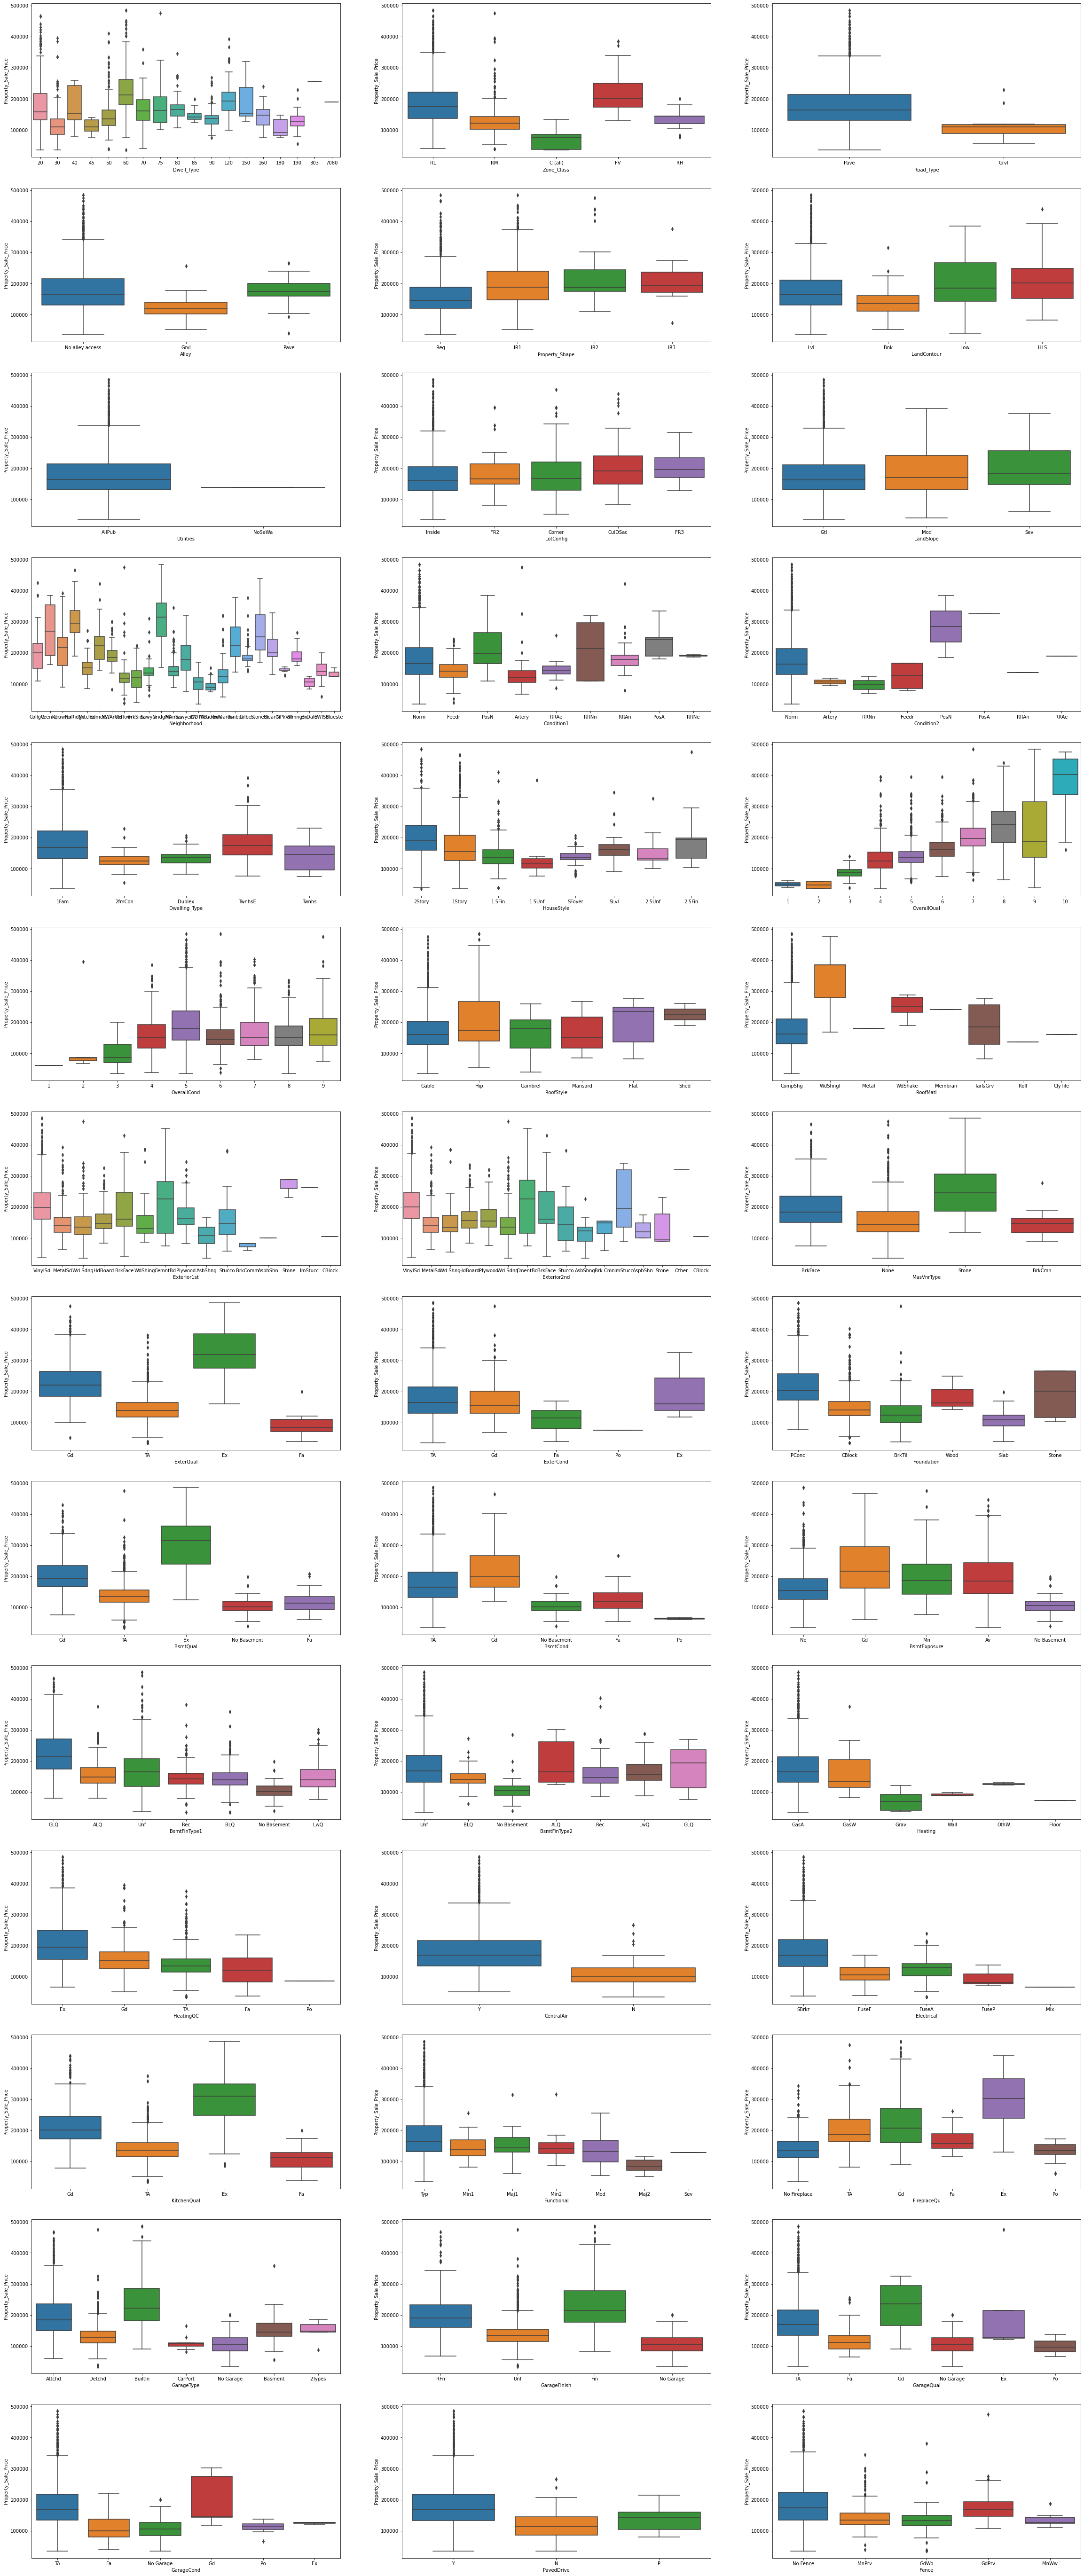

In [38]:
cat_data = list(non_numerical_data.columns)

fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize = (40, 100))

# plot the boxplot for each categoric and target variable
for variable, subplot in zip(cat_data, ax.flatten()):
    sns.boxplot(x = variable, y = 'Property_Sale_Price', data = df, ax = subplot)
    
# display the plot
plt.show()

It can be seen that most of the categorical variables have an effect on the sale price of the property. The median sale price rises exponentially with respect to the rating of the overall quality of the material used.

<br>
____________________________________________________________________________________________________________________________

## Data Preparation

#### * Checking Data Normality

**Plot a histogram and also perform the Shapiro-Wilk test**

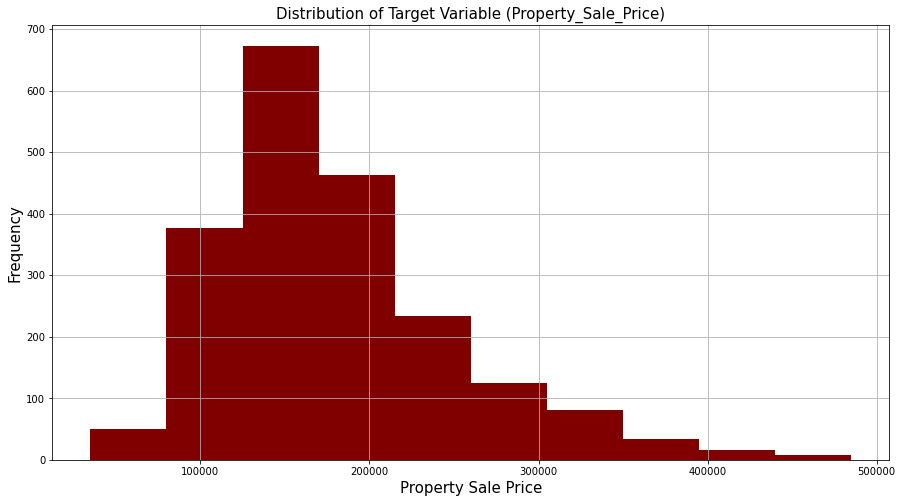

In [39]:
# check the distribution of target variable
df.Property_Sale_Price.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Property Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

- We can see that the variable 'Property_Sale_Price' is positively skewed and thus we can say that it is not normally distributed.

- We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights.

### Let us perform from Shapiro-Wilk test to check the normality of the target variable.

The null and alternate hypothesis of Shapiro-Wilk test is as follows:

**Ho:** The data is normally distributed

**H1:** The data is not normally distributed

In [40]:
# To perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# shapiro() returns the test statistics along with the p-value of the test
stat, p = shapiro(df.Property_Sale_Price)

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.926, p-value=0.000
The data is not normally distributed (reject H0)


- We can see that the p-value is less than 0.05 and thus we reject the null hypothesis. It can be concluded that the data is not normally distributed.

- We need to log transform the variable 'Property_Sale_Price' in order to reduce the skewness.

Shaprio Wilk Test does not work if the number of observations are more than 5000. However Shapiro Wilk test is more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used.

#### If the data is not normally distributed, use `log`  or `boxcox` transformation to reduce the skewness & get a near normally distributed data

#### Application Of Log-Transformation:

In [41]:
# log transformation using np.log()
df['log_Property_Sale_Price'] = np.log(df['Property_Sale_Price'])

# display the top 5 rows of the data
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


#### Recheck for normality by plotting histogram and performing Shapiro-Wilk test

Let us first plot a histogram of log_Property_Sale_Price.

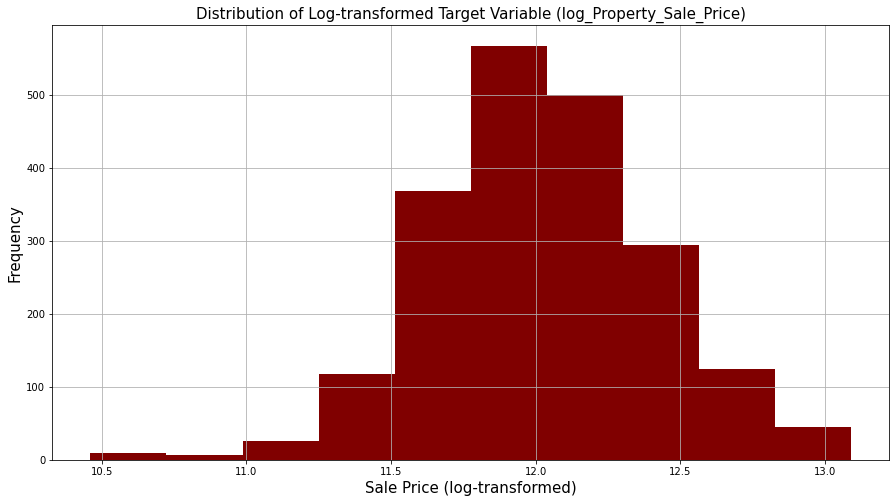

In [42]:
# recheck for normality 
# plot the histogram using hist
df.log_Property_Sale_Price.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

<b>It can be seen that the variable log_Property_Sale_Price is near normally distributed. Lets confirm it again by using the Shapiro-Wilk test.</b>

#### Let us perform Shapiro-Wilk test.

In [43]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df['log_Property_Sale_Price'])

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.991, p-value=0.000
The data is not normally distributed (reject H0)


In [44]:
# find the skewness of the variable log_Property_Sale_Price
df['log_Property_Sale_Price'].skew()

-0.10293032838737998

**It can be visually seen that the data has near-normal distribution, but Shapiro-Wilk test does not support the claim.**

**Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs.**

#### Application Of Reciprocal Transformation:

In [45]:
# Reciprocal Transformation

from scipy import stats
df['Reciprocal_Property_Sale_Price'] = 1/(df['Property_Sale_Price']+1)

In [46]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df['Reciprocal_Property_Sale_Price'])

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.845, p-value=0.000
The data is not normally distributed (reject H0)


### Dropping Useless columns

In [47]:
remove_cols(df,'Reciprocal_Property_Sale_Price')

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011


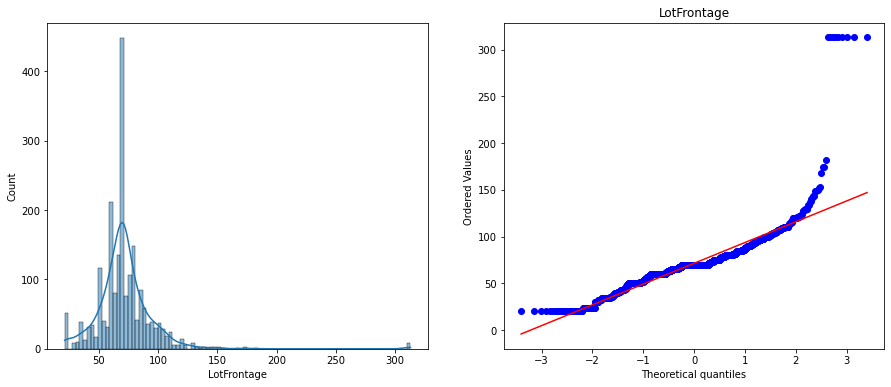

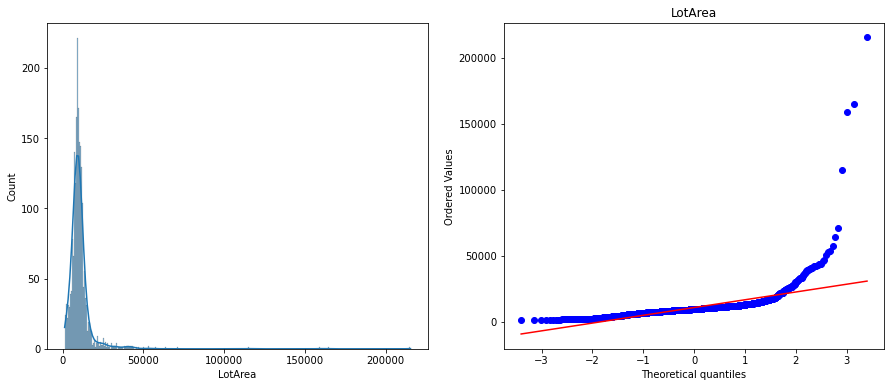

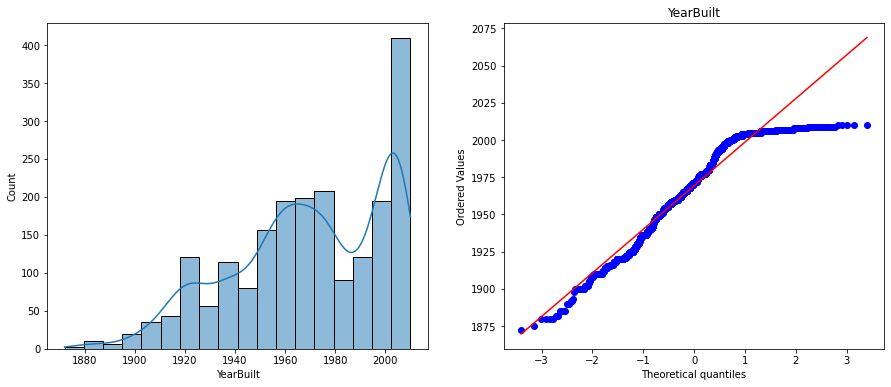

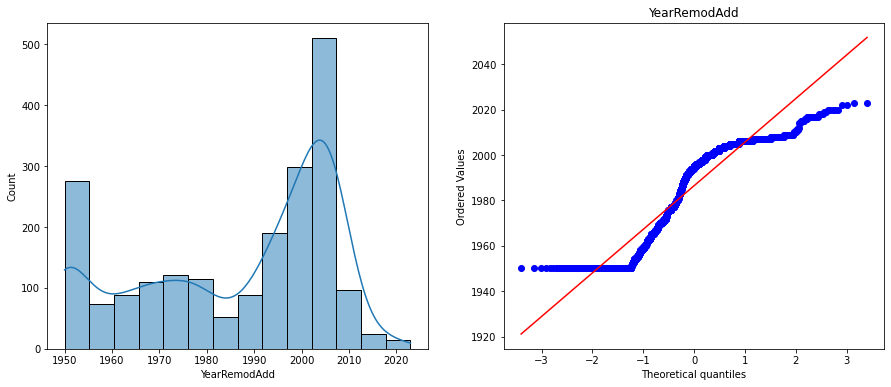

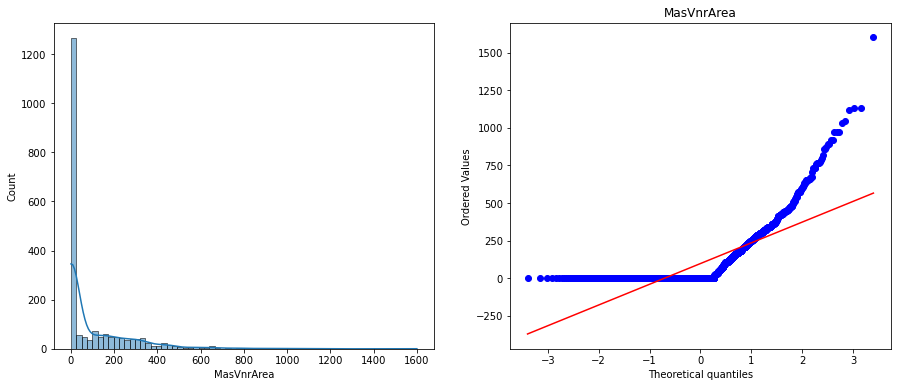

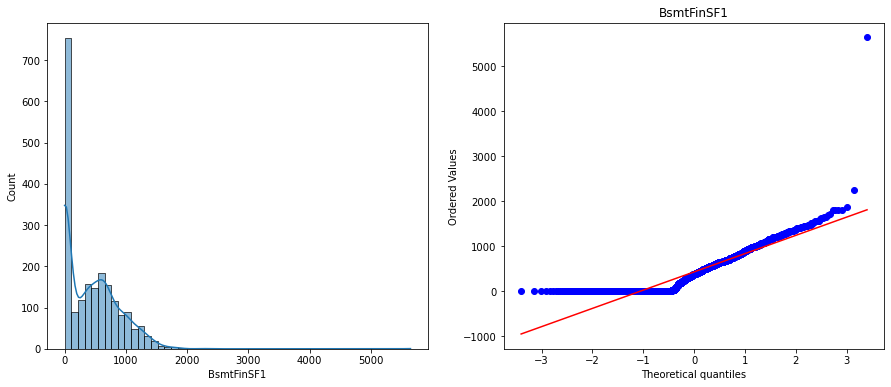

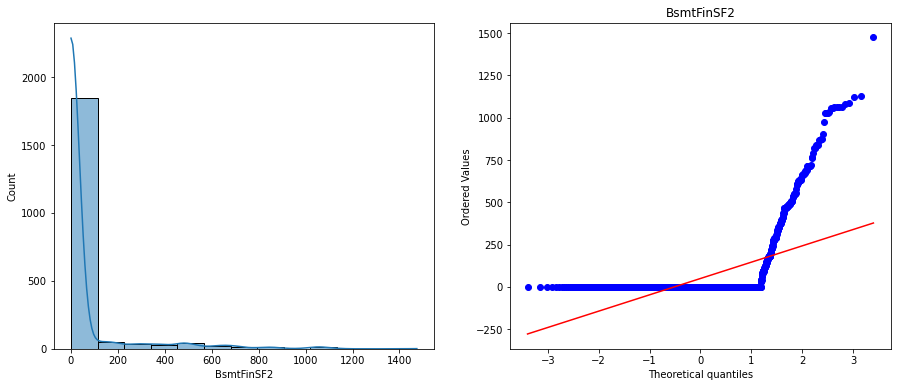

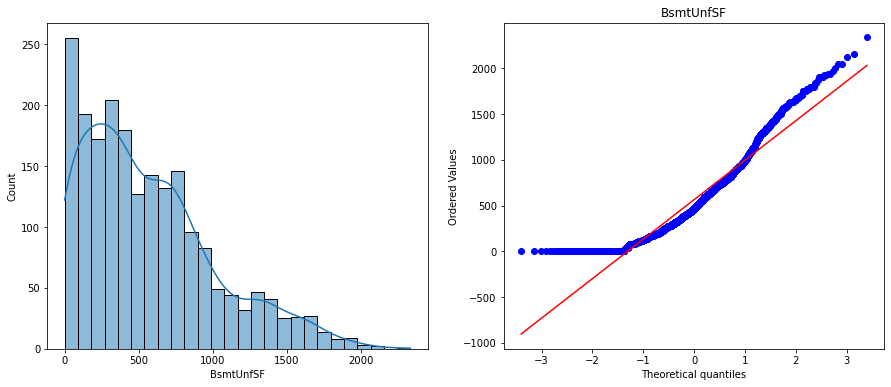

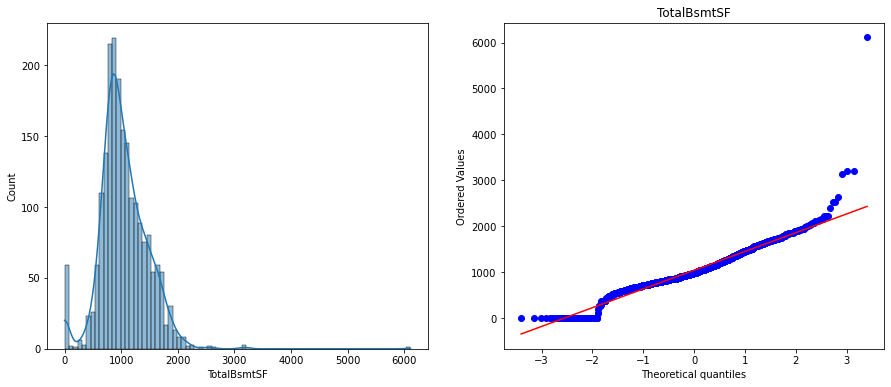

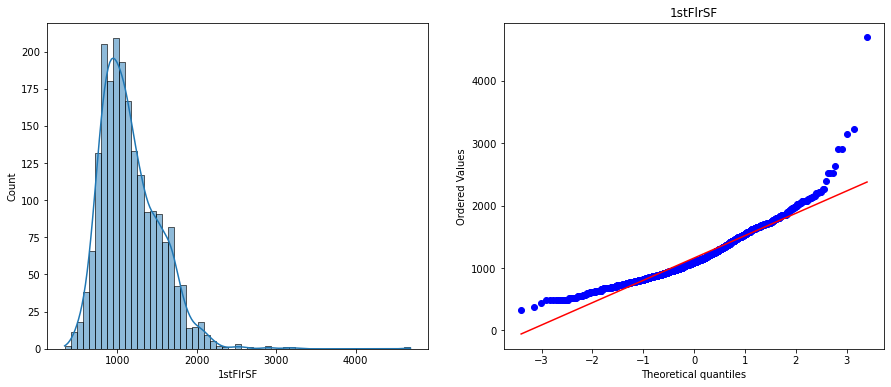

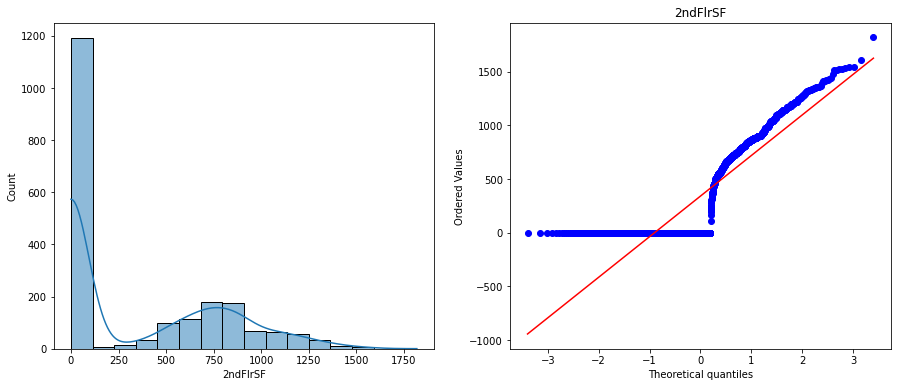

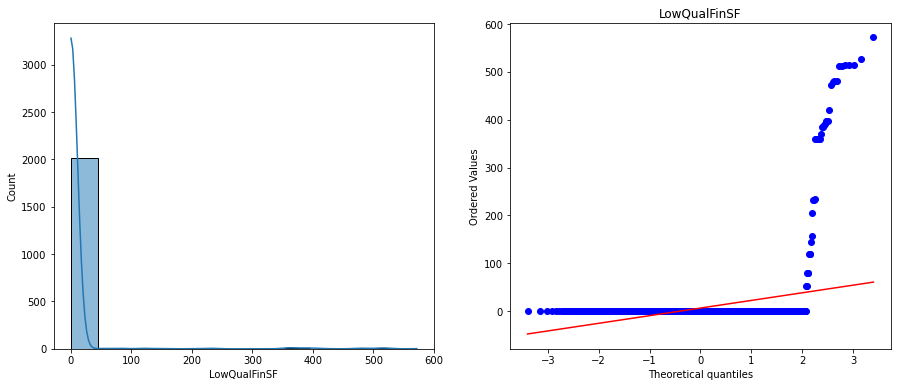

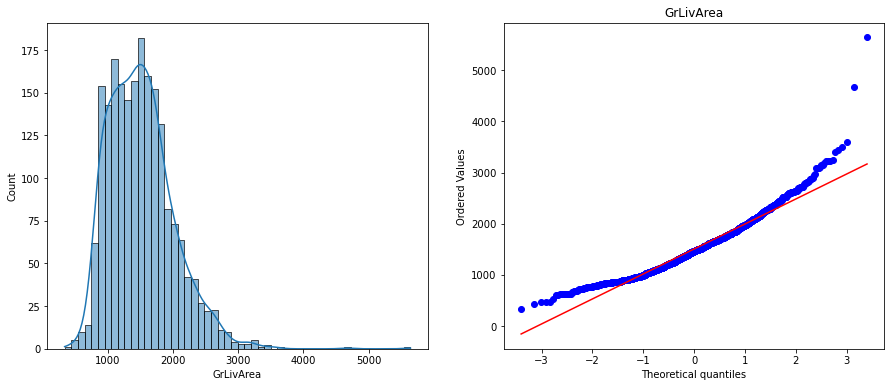

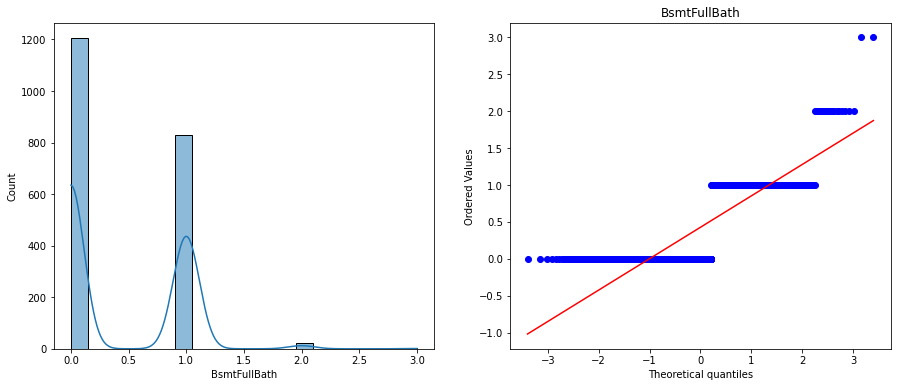

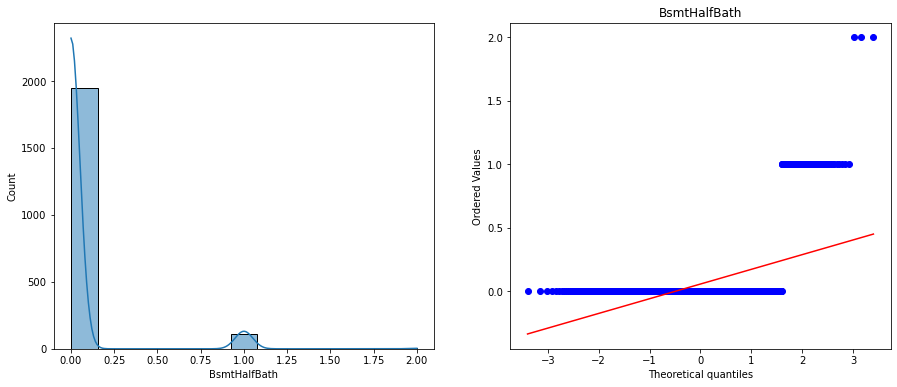

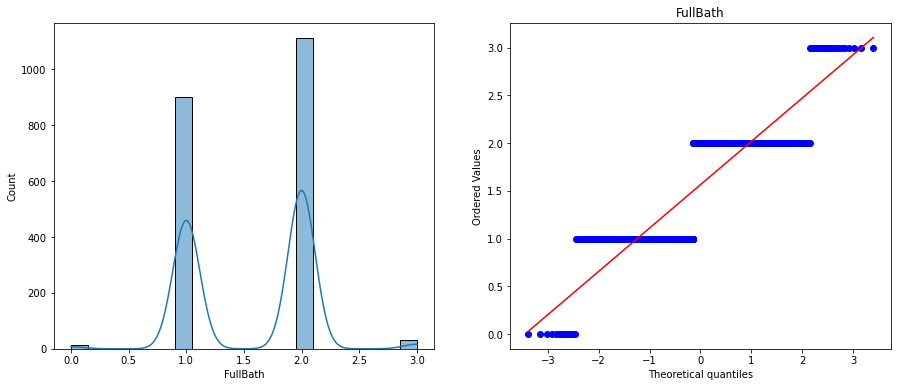

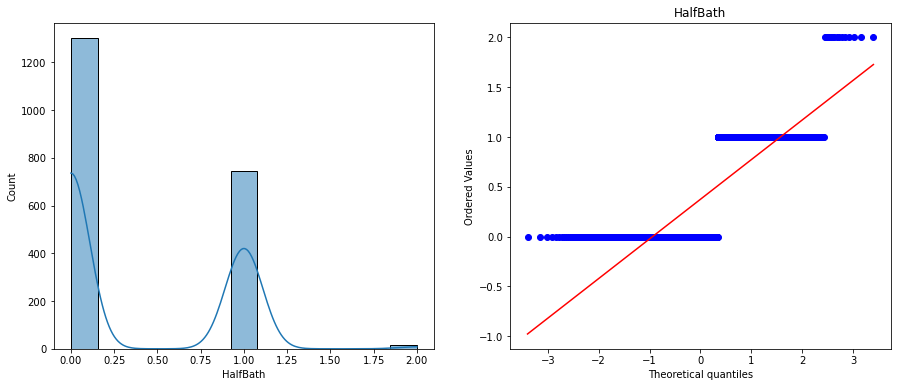

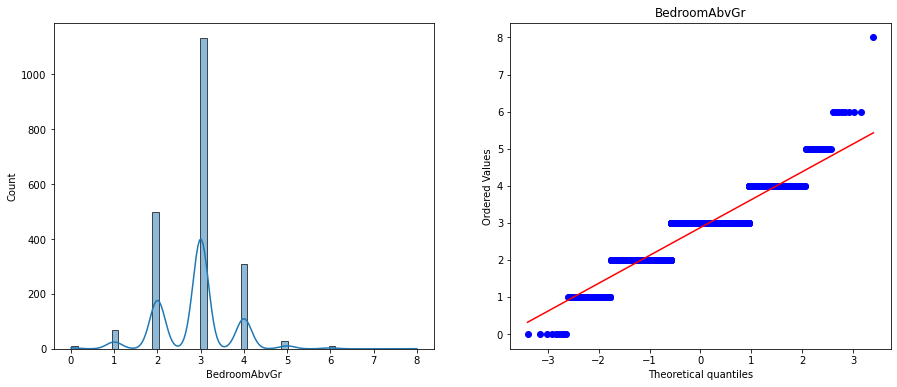

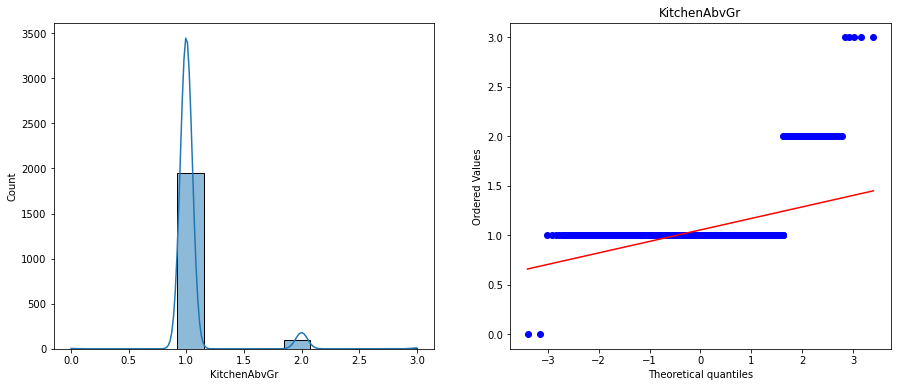

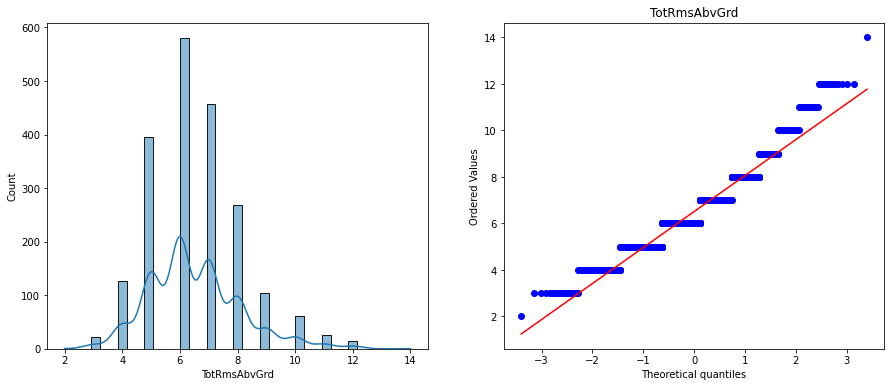

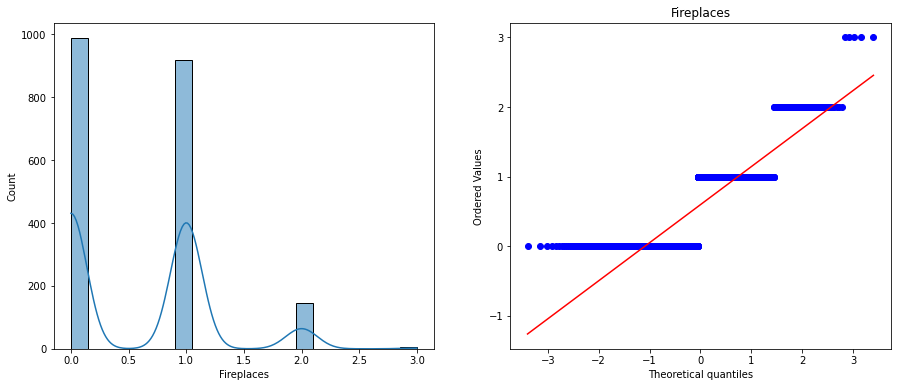

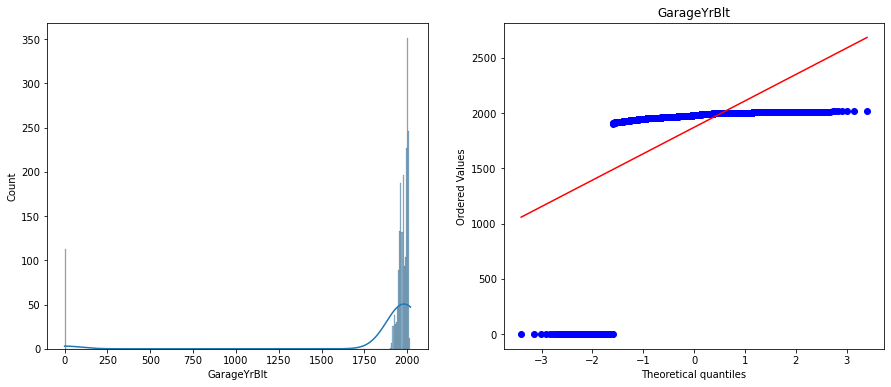

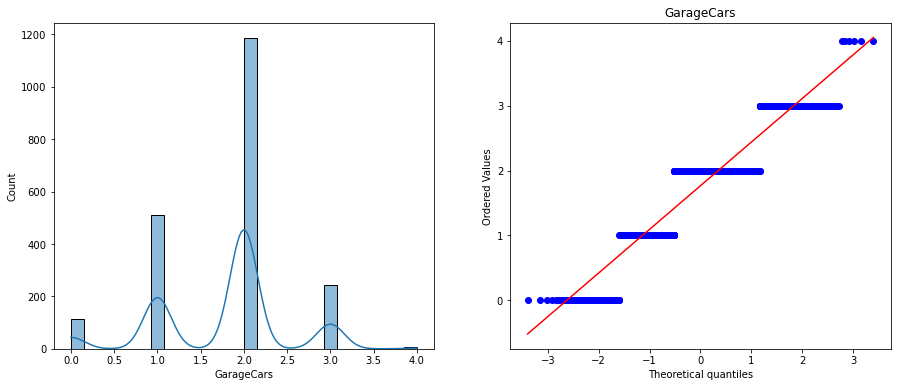

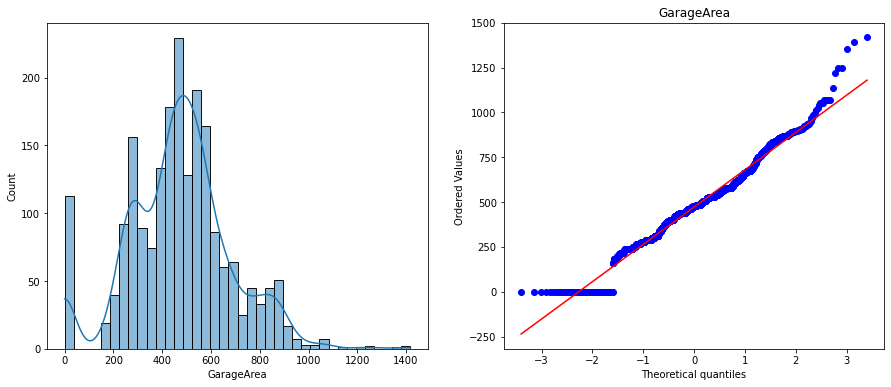

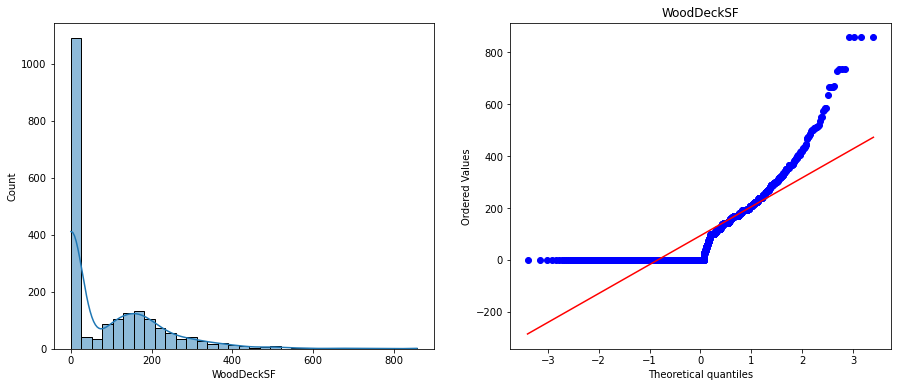

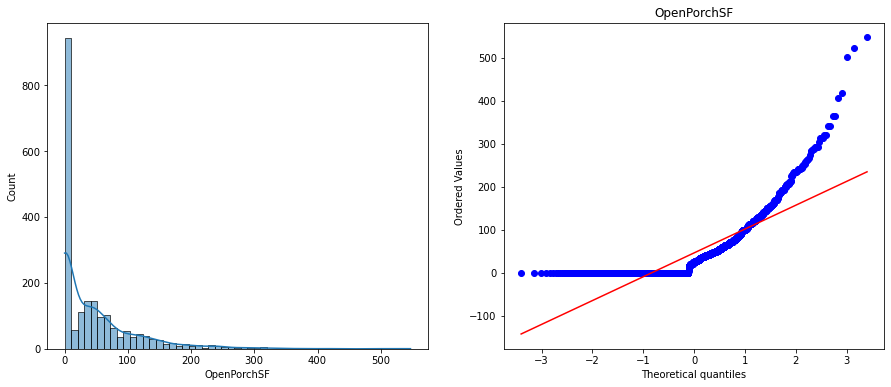

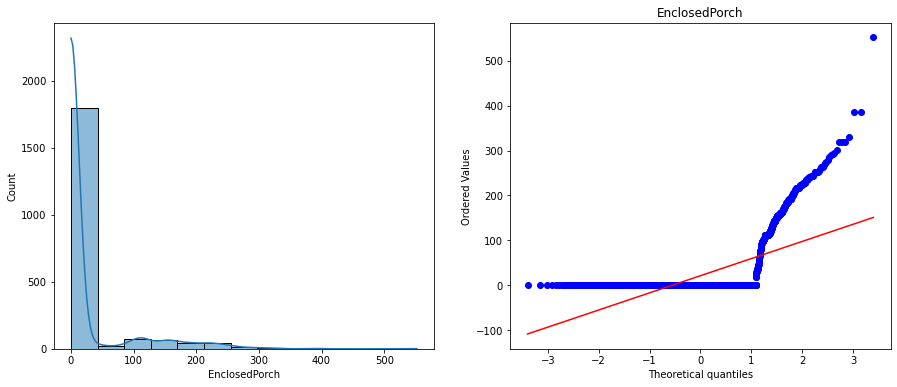

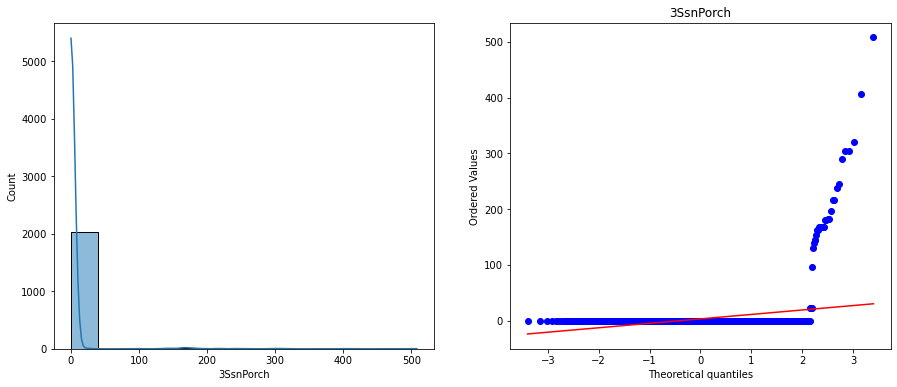

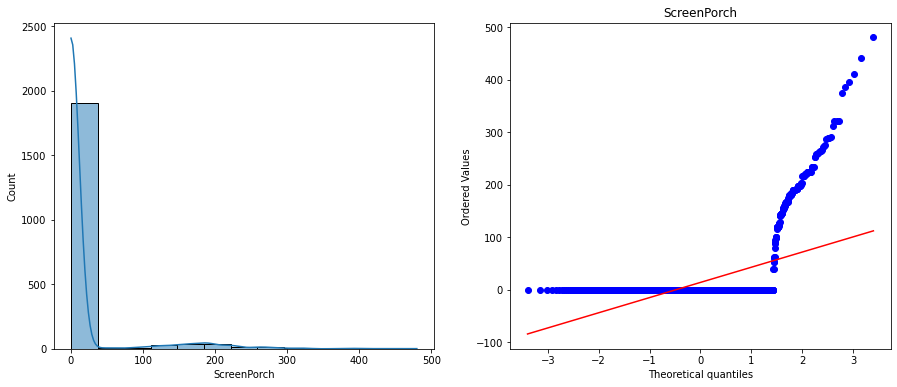

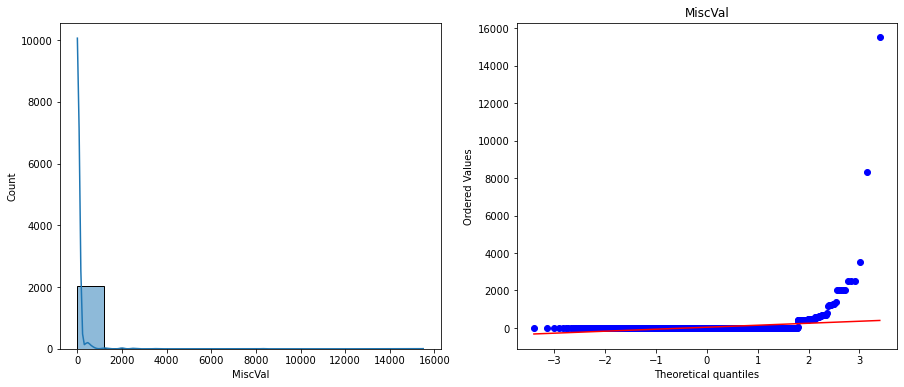

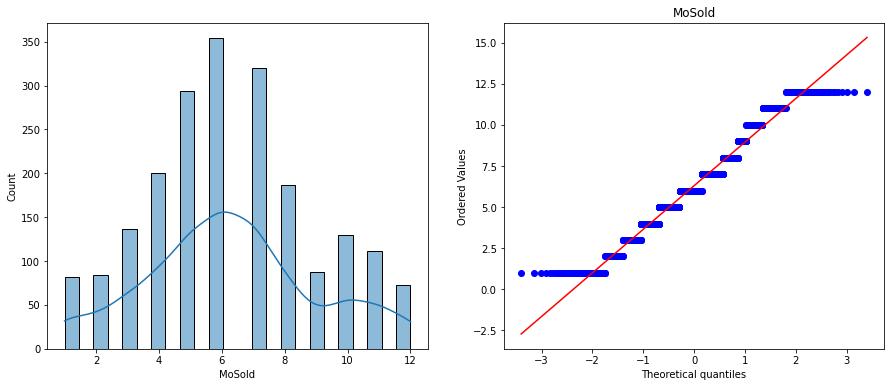

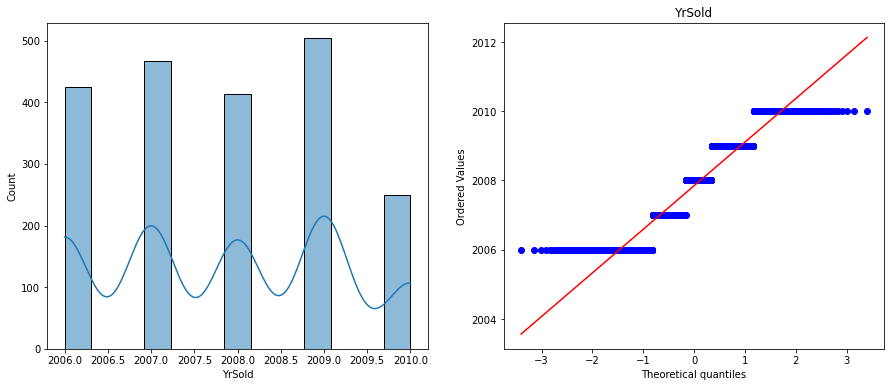

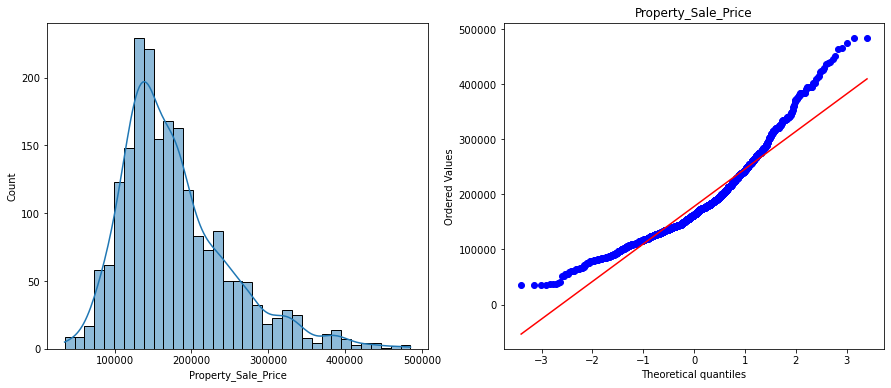

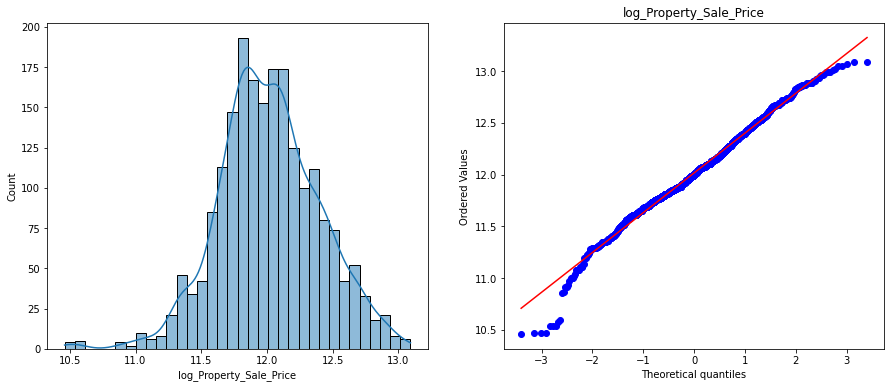

In [48]:
# ---------------------------------- Checking Distribution Of data --------------------------------------------

import pylab
import scipy.stats as stats

def diagonisticPlots(data, feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(data[feature], kde= True)
    
    plt.subplot(1,2,2)
    stats.probplot(df[i], dist='norm', plot=pylab)
    plt.title(i)
    pylab.show()
    

df_copy1 = df.copy()

numerical_data = df_copy1.select_dtypes(include = [np.number]).columns

all_numerical_data = df_copy1[numerical_data]
    
for i in all_numerical_data:
    diagonisticPlots(df_copy1,i)

**OBSERVATIONS:**

- Lot of data is not normally distributed.

<br>
_____________________________________________________________________________________________________________________________


## Dummy Variable Encoding On Categorical Variable

We need to perform dummy encoding on our categorical variables before we proceed; since the method of OLS works only on the numeric data.

**Dummy encode the catergorical variables**

In [49]:
# filter out the numeric variables and consider only the categorical variables using (include=np.number)
df_categoric_features = df.select_dtypes(exclude=np.number)

# to create the dummy variables  we use 'get_dummies()' from pandas 
# to create (n-1) dummy variables we use 'drop_first = True' 
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables

In [50]:
# filter out the categorical variables and consider only the numeric variables using (include=np.number)
df_numeric_features = df.select_dtypes(include=np.number)

# concatenate the numerical and dummy encoded categorical variables column-wise
df_property_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_property_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,Garage

In [51]:
df.shape

(2059, 79)

In [52]:
# check the dimensions of the dataframe
df_property_dummy.shape

(2059, 288)

<br>
______________________________________________________________________________________________________________________________


## Multiple Linear Regression Full Model with Log Transformed Dependent Variable (OLS)

In [53]:
import statsmodels.api as sm

# Add the intercept col using 'add_constant()'
data = sm.add_constant(df_property_dummy)

# -------------------------------------------------------------------------------------------------------------------------

# separate the independent and dependent variables
# drop(): drops the specified columns
X = df_property_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# -------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# -------------------------------------------------------------------------------------------------------------------------

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 286)
The shape of X_test is: (618, 286)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


### Building Model

In [54]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_logmodel_full = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_logmodel_full.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     71.93
Date:                     Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                             13:07:16   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2221.
Df Residuals:                         1174   BIC:                            -813.4
Df Model:                              266                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

This model explains around 94% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 1.05e+19 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 1.885 i.e. close to 2.0 and thus it indicates that there is no autocorrelation.

Condition Number : Multicollinearity can be checkked by computing the condition number(CN). If condition number is between 100 and 1000, there is moderate multicollinearity, if condition number is less than 100, there is no multicollinearity and if condition number is greater 1000 there is severe multicollinearity in the data.

Durbin-Watson : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.

In [55]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()

In [56]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_logmodel_full_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

#### Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [59]:
from sklearn import metrics
from sklearn import preprocessing
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# calculate rmse using rmse()
linreg_logmodel_full_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj 

In [60]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,27515.821559,0.942188,0.929089


#### We will also build a linear regression model without performing log transformation on the target variable.

<br>
_______________________________________________________________________________________________________________________________


## Multiple Linear Regression Full Model without Log Transformed Target Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'Property_Sale_Price' variable as it is.

We have already done train and test split while building the previous model.

In [61]:
# build a OLS model using function OLS()
# Property_Sale_Price is our target variable
# use fit() to fit the model on train data
linreg_nolog_model = sm.OLS(y_train['Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_nolog_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.942
Model:                             OLS   Adj. R-squared:                  0.929
Method:                  Least Squares   F-statistic:                     72.15
Date:                 Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                         13:14:30   Log-Likelihood:                -16075.
No. Observations:                 1441   AIC:                         3.268e+04
Df Residuals:                     1174   BIC:                         3.409e+04
Df Model:                          266                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
LotFrontage   

This model explains around 94% of the variation in dependent variable Property_Sale_Price. The Durbin-Watson test statistics is 1.868 and indicates that there is no autocorrelation. The Condition Number 1.05e+19 suggests that there is severe multicollinearity in the data.

In [62]:
# predict the 'Property_Sale_Price' using predict()
linreg_nolog_model_predictions = linreg_nolog_model.predict(X_test)

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [63]:
# calculate rmse using rmse()
linreg_nolog_model_rmse = rmse(actual_Property_Sale_Price, linreg_nolog_model_predictions)

# calculate R-squared using rsquared
linreg_nolog_model_rsquared = linreg_nolog_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_nolog_model_rsquared_adj = linreg_nolog_model.rsquared_adj 

In [64]:
# append the result table 
# compile the required information
linreg_nolog_model_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_nolog_model_rmse,
                                                 'R-Squared': linreg_nolog_model_rsquared,
                                                 'Adj. R-Squared': linreg_nolog_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,27515.821559,0.942188,0.929089
1,Linreg full model without log of target variable,36653.750048,0.942355,0.929294


If we compare the results in the table we can see that the linreg model withh log of target variable is performing slightly better than the model without log of target variable. Thus we will continue with the target variable 'log_Property_Sale_Price'.

Let us perform feature engineering and take a look at building a linear regression full model by adding new features to the dataset.

<br>
______________________________________________________________________________________________________________________________

## Feature Engineering

It is the process of creating new features using domain knowledge of the data that provides more insight into the data. Let us create a few features from the existing dataset and build a regression model on the newly created data.


#### Multiple Linear Regression (Using New Feature) - 1

**In order to build the model, we do the following:**

1. Create a new feature by using variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'.

**Calculate the complete area of the house.**

Create a new variable `TotalSF` representing the total square feet area of the house by adding the area of the first floor, second floor, ground level and basement of the house.

In [65]:
# create a new variable 'TotalSF' using the variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea']

# as we have created a new variable using the variables 
#'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' and 'GrLivArea', we will remove them
# use 'drop()' to remove the variables
df = df.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"], axis=1)

In [66]:
# filter out the categorical variables and consider only the numerical variables using (include=np.number)
df_numeric_features = df.select_dtypes(include=np.number)

# filter out the numerical variables and consider only the categorical variables using (include=object)
df_categoric_features = df.select_dtypes(include = object)

#### Dummy encode the catergorical variables

In [67]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables

In [68]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,TotalSF,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,

In [69]:
df_dummy.shape

(2059, 285)

#### Split the data into train and test sets

In [70]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train data and test data 
# what proportion of data should be included in test data is specified using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 284)
The shape of X_test is: (618, 284)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


In [71]:
# build a full model using OLS()
# consider the target variable 'log_Property_Sale_Price'
# use fit() to fit the model on train data
linreg_feature_1_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_feature_1_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.26
Date:                     Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                             13:24:35   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2223.
Df Residuals:                         1175   BIC:                            -820.6
Df Model:                              265                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [72]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_feature_1_model_predictions = linreg_feature_1_model.predict(X_test)

In [73]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_feature_1_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [74]:
# calculate rmse using rmse()
linreg_feature_1_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_feature_1_model_rsquared = linreg_feature_1_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_feature_1_model_rsquared_adj = linreg_feature_1_model.rsquared_adj 

In [75]:
# append the accuracy scores to the table
# compile the required information
linreg_feature_1_model_metrics = pd.Series({'Model': "Linreg with new feature (TotalSF) ",
                                                'RMSE': linreg_feature_1_model_rmse,
                                                'R-Squared': linreg_feature_1_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_1_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_feature_1_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,27515.821559,0.942188,0.929089
1,Linreg full model without log of target variable,36653.750048,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148


<br>
______________________________________________________________________________________________________________________________

# Multiple Linear Regression (Using New Feature)

#### 1. Create two new feature by using variables 'Buiding_age' and 'Remodel_age'

In [76]:
# 'datetime' is used to perform operations related to date and time
import datetime as dt

# 'now().year' returns the current year
current_year = int(dt.datetime.now().year)

In [78]:
# create 2 new variables 'Buiding_age' and 'Remoel_age' 
Buiding_age = current_year - df.YearBuilt
Remodel_age = current_year - df.YearRemodAdd

In [79]:
# append the newly created variables to the dataframe
df['Buiding_age'] = Buiding_age
df['Remodel_age'] = Remodel_age

# as we have added a new variable using the variables 'YearBuilt' and 'YearRemodAdd', we will drop them
# drop the variables using drop()
df = df.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [80]:
# filter out the categorical variables and consider only the numerical variables using (include=np.number)
df_numeric_features = df.select_dtypes(include=np.number)

# filter out the numerical variables and consider only the categorical variables using (include=object)
df_categoric_features = df.select_dtypes(include = object)

#### Dummy encode the catergorical variables

In [81]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables

In [82]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,TotalSF,Buiding_age,Remodel_age,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort

In [83]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train data and test data 
# what proportion of data should be included in test data is specified using 'test_size'
# set 'random_state' to get the same data each time the code is executed  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 284)
The shape of X_test is: (618, 284)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


In [84]:
# build a OLS model using the function OLS()
# consider the target variable "log_Property_Sale_Price" 
# use fit() to fit the model on train data
linreg_feature_2_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_feature_2_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.26
Date:                     Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                             14:28:10   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2223.
Df Residuals:                         1175   BIC:                            -820.6
Df Model:                              265                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

This model explains around 94% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 8.32e+18 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 1.885 and indicates that there is no autocorrelation.

In [86]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_feature_2_model_predictions = linreg_feature_2_model.predict(X_test)

Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()

In [87]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_feature_2_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [88]:
# calculate rmse using rmse()
linreg_feature_2_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_feature_2_model_rsquared = linreg_feature_2_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_feature_2_model_rsquared_adj = linreg_feature_2_model.rsquared_adj 

In [89]:
# append the accuracy scores to the table
# compile the required information
linreg_feature_2_model_metrics = pd.Series({'Model': "Linreg with new features (Building_age and Remodel_age)",
                                                'RMSE': linreg_feature_2_model_rmse,
                                                'R-Squared': linreg_feature_2_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_2_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_feature_2_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,27515.821559,0.942188,0.929089
1,Linreg full model without log of target variable,36653.750048,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148
3,Linreg with new features (Building_age and Rem...,26482.832257,0.942187,0.929148


RMSE of the model with new features 'Building_age' and 'Remodel_age' is increased. The value of R-squared and aadjusted R-squared is same as the previous model.

<br>
______________________________________________________________________________________________________________________________

# Feature Selection

### Variance Inflation Factor

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate the VIF of the numerical independent variables. VIF for the variable Vi is given as:

VIF = 1 / (1 - R-squared)


Where, R-squared is the R-squared of the regression model build by regressing one independent variable (say Vi) on all the remaining independent variables (say Vj, j ≠ i).

In [91]:
# consider the independent variables in the dataframe 'df_property' 
# remove the target variables 'Property_Sale_Price' and 'log_Property_Sale_Price' using drop() function
df_property_features = df.drop(['Property_Sale_Price', 'log_Property_Sale_Price'], axis = 1)

# filter out the categorical variables and consider only the numerical variables using (include=np.number)
df_numeric_features_vif = df_property_features.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,TotalSF,Buiding_age,Remodel_age
0,65.0,8450,196.0,706,0,150,0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,4276,18,18
1,80.0,9600,0.0,978,0,284,0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,3786,45,45
2,68.0,11250,162.0,486,0,434,0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,4492,20,19
3,60.0,9550,0.0,216,0,540,0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,4190,106,51
4,84.0,14260,350.0,655,0,490,0,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,5541,21,21


**Calculate the VIF for each numeric variable.**

In [92]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'reset_index' resets the index of the dataframe
# 'ascending = False' sorts the data in descending order
# 'drop = True' drops the index that was previously created
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,111.278583,TotalSF
1,86.330068,YrSold
2,85.370786,TotRmsAbvGrd
3,38.758975,GarageCars
4,33.441543,GarageYrBlt
5,31.120731,GarageArea
6,29.727837,BedroomAbvGr
7,27.957110,KitchenAbvGr
8,22.634089,FullBath
9,11.077300,BsmtUnfSF


We can see that the variable 'YrSold' has the highest VIF. We will remove the variables having VIF greater than 10. We want to remove the variable for which the remaining variables explain more than 90% of the variation and thus we set the threshold to 10. The value of threshold is completely experimental i.e. it depends on the business requirements. One can choose the threshold other than 10.

In [93]:
# we will calculate the VIF for each numerical variable
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) 
                         for i in range(df_numeric_features_vif.shape[1])]

    # create a column of feature names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'vif_more_than_10' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    vif_more_than_10 = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'vif_more_than_10' is not empty, then sort the dataframe by VIF values
    # if dataframe 'vif_more_than_10' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' 
    # and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(vif_more_than_10.empty == False):
        df_sorted = vif_more_than_10.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor       Features
0     9.076788    LotFrontage
1     2.670209        LotArea
2     1.686137     MasVnrArea
3     5.691644     BsmtFinSF1
4     1.392076     BsmtFinSF2
5     4.789179      BsmtUnfSF
6     1.054533   LowQualFinSF
7     3.406683   BsmtFullBath
8     1.183192   BsmtHalfBath
9     1.786593       HalfBath
10    2.448323     Fireplaces
11    8.381704     GarageArea
12    1.789047     WoodDeckSF
13    1.755506    OpenPorchSF
14    1.296373  EnclosedPorch
15    1.026487      3SsnPorch
16    1.172528    ScreenPorch
17    1.015224        MiscVal
18    5.594129         MoSold
19    6.037207    Buiding_age
20    5.250963    Remodel_age


**The above dataframe contains all the variables with VIF less than 10.**

### In order to build the model, we do the following

#### Now, let us build the model using the categorical variables and the numerical variables obtained from VIF.

**1. Concatenate numerical and dummy encoded categorical variables**

In [94]:
# lets consider the variables obtained from VIF
# use the dummy variables created previously
# concatenate the numerical and dummy encoded categorical variables
df_dummy = pd.concat([df_numeric_features_vif, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_dummy.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,Buiding_age,Remodel_age,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,Garag

In [96]:
# add the intercept column using 'add_constant()'
df_dummy = sm.add_constant(df_dummy)

# consider independent variables
# create a copy of 'df_dummy' and store it as X
X = df_dummy.copy()

# extract the target variable from the data set
y = df[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train data and test data 
# what proportion of data should be included in test data is specified using 'test_size'
# set 'random_state' to get the same data each time the code is executed  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 276)
The shape of X_test is: (618, 276)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


In [97]:
# build a full model using OLS()
# consider the target variable log_Property_Sale_Price 
# use fit() to fit the model on train data
linreg_vif_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_vif_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.931
Model:                                 OLS   Adj. R-squared:                  0.916
Method:                      Least Squares   F-statistic:                     61.84
Date:                     Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                             14:34:40   Log-Likelihood:                 1247.3
No. Observations:                     1441   AIC:                            -1979.
Df Residuals:                         1183   BIC:                            -618.1
Df Model:                              257                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

This model explains around 93% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 6.97e+18 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 1.905 and indicates that there is no autocorrelation.

In [98]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_vif_model_predictions = linreg_vif_model.predict(X_test)

Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()

In [99]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_vif_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [100]:
# calculate rmse using rmse()
linreg_vif_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_vif_model_rsquared = linreg_vif_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_vif_model_rsquared_adj = linreg_vif_model.rsquared_adj 

In [101]:
# append the accuracy scores to the table
# compile the required information
linreg_vif_model_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_vif_model_rmse,
                                                'R-Squared': linreg_vif_model_rsquared,
                                                'Adj. R-Squared': linreg_vif_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,27515.821559,0.942188,0.929089
1,Linreg full model without log of target variable,36653.750048,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148
3,Linreg with new features (Building_age and Rem...,26482.832257,0.942187,0.929148
4,Linreg with VIF,32783.416036,0.930722,0.915671


From the above table we can see that the linear regression with new features has the lowest RMSE value. Thus, it can be concluded that the linear regression model with new features can be used to predict the price of the house.